In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import glob
import sys

In [2]:
nb_dir = '/home/dup193/work/double_pulse/stat_analysis'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from event_selection import EventSelectionPreCut, GetRates,MakeSimSum, GetRatesSim

In [3]:
secs_per_year = 31536000
LLH = -0.1
live_time_b = 1898429.5199999993

contain = 0 #10
b = 420 #400
m = 1/3 #-1./3.
bottomz = -200 #-200
bottome = 5 #75
colors = ['red','#332288', '#BB25BB', '#117733', '#999933', '#661100']
weight_name = 'weight_val_0'
wtype = 'nom'
weight_name_c = 'weight_val'

In [4]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_1_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_1_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_1_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_3_1.npy',mmap_mode='r')
data_n0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuALL_2_1.npy',mmap_mode='r')
data_ac0 = np.load('/fastio2/dasha/double_pulse/data_AtmosConv.npy',mmap_mode='r')
data_ap0 = np.load('/fastio2/dasha/double_pulse/data_AtmosPrompt.npy',mmap_mode='r')
data_g0 = np.load('/fastio2/dasha/double_pulse/data_MuonGun_all.npy', mmap_mode='r')
data_c0= np.load('/fastio2/dasha/double_pulse/data_20904_corsika_test.npy', mmap_mode='r')
#data_c0 = np.load('/fastio2/dasha/double_pulse/data_ALL_CC_CNN_corsika.npy',mmap_mode='r')
data_b0= np.load('/fastio2/dasha/double_pulse/data_BurnSample_RF.npy', mmap_mode='r')

In [5]:
data_g0 = data_g0[np.isfinite(data_g0['logan_veto']['SPE_rlogl']) & np.isfinite(data_g0['logan_veto']['Cascade_rlogl'])]
maskl_g = data_g0['logan_veto']['SPE_rlogl']-data_g0['logan_veto']['Cascade_rlogl'] > LLH
data_g = data_g0[maskl_g]

data_b0 = data_b0[np.isfinite(data_b0['logan_veto']['SPE_rlogl']) & np.isfinite(data_b0['logan_veto']['Cascade_rlogl'])]
maskl_b = data_b0['logan_veto']['SPE_rlogl']-data_b0['logan_veto']['Cascade_rlogl'] > LLH
data_b = data_b0[maskl_b]

In [6]:
data_tc,data_mc,data_ec,data_eg,data_n,data_ac,data_ap,data_c = \
    EventSelectionPreCut(data_tc0,data_mc0,data_ec0,data_eg0,data_n0,data_ac0,data_ap0,data_c0)
print(data_tc0.shape,data_mc0.shape,data_ec0.shape,data_eg0.shape,data_n0.shape,data_ac0.shape,data_ap0.shape,data_c0.shape)
print(data_tc.shape,data_mc.shape,data_ec.shape,data_eg.shape,data_n.shape,data_ac.shape,data_ap.shape,data_c.shape)

(128278,) (462405,) (420185,) (4267,) (154981,) (1165870,) (708917,) (59311,)
(107627,) (79673,) (388076,) (2884,) (143478,) (643549,) (504026,) (59311,)


In [7]:
#Make the backround array
path = "/home/dup193/work/double_pulse/dataframes/"
sig, sim = MakeSimSum(data_tc,data_mc,data_ec,data_eg,data_n,data_ac,data_ap,data_c, path, livetime=secs_per_year,\
             weight_name='weight_val_0', weight_name_c = 'weight_val', wtype ='nom')

In [8]:
GetRatesSim("Rates after NET1 and NET3",sim,secs_per_year)

Rates after NET1 and NET3
SumSim = 93732.367 +/- 1341.283


In [9]:
GetRates("Rates at the start",secs_per_year,data_tc,data_mc,data_ec,data_eg,data_n,data_ac,data_ap,data_c,data_g,data_b)
#Events may have incinsistent cuts applied here

Rates at the start
NuTauCC = 64.26551 +/- 0.33368
NuMuCC = 18.16709 +/- 0.11876
NuECC =  100.87184 +/- 0.29031
NuEGR =  0.54343 +/- 0.02406
NuNC =   36.73585 +/- 0.19782
NuConv =   121.81094 +/- 1.37895
NuPrompt =   4.90527 +/- 0.01582
Corsika =   93385.06682 +/- 1341.28246
MuonGun =   14381.91141 +/- 55.28252


In [52]:
Qst1 = 2000
Qst2 = 10
Qst3 = 10
NET1 =0.99
NET2 =0.98
NET3 =0.85

maskq_tc = (data_tc['qst']['q'][:,0] >= Qst1) & (data_tc['qst']['q'][:,1] >= Qst2) & (data_tc['qst']['q'][:,2] >= Qst3)
maskq_mc = (data_mc['qst']['q'][:,0] >= Qst1) & (data_mc['qst']['q'][:,1] >= Qst2) & (data_mc['qst']['q'][:,2] >= Qst3)
maskq_ec = (data_ec['qst']['q'][:,0] >= Qst1) & (data_ec['qst']['q'][:,1] >= Qst2) & (data_ec['qst']['q'][:,2] >= Qst3)
maskq_eg = (data_eg['qst']['q'][:,0] >= Qst1) & (data_eg['qst']['q'][:,1] >= Qst2) & (data_eg['qst']['q'][:,2] >= Qst3) 
maskq_n = (data_n['qst']['q'][:,0] >= Qst1) & (data_n['qst']['q'][:,1] >= Qst2) & (data_n['qst']['q'][:,2] >= Qst3)
maskq_ac = (data_ac['qst']['q'][:,0] >= Qst1) & (data_ac['qst']['q'][:,1] >= Qst2) & (data_ac['qst']['q'][:,2] >= Qst3)
maskq_ap = (data_ap['qst']['q'][:,0] >= Qst1) & (data_ap['qst']['q'][:,1] >= Qst2) & (data_ap['qst']['q'][:,2] >= Qst3) 
maskq_c = (data_c['qst']['q'][:,0] >= Qst1) & (data_c['qst']['q'][:,1] >= Qst2) & (data_c['qst']['q'][:,2] >= Qst3)
maskq_g = (data_g['qst']['q'][:,0] >= Qst1) & (data_g['qst']['q'][:,1] >= Qst2) & (data_g['qst']['q'][:,2] >= Qst3)
maskq_b = (data_b['qst']['q'][:,0] >= Qst1) & (data_b['qst']['q'][:,1] >= Qst2) & (data_b['qst']['q'][:,2] >= Qst3)

masks_tc = (data_tc['preds']['n1'] >= NET1) & (data_tc['preds']['n2'] >= NET2) & (data_tc['preds']['n3'] >= NET3) 
masks_mc = (data_mc['preds']['n1'] >= NET1) & (data_mc['preds']['n2'] >= NET2) & (data_mc['preds']['n3'] >= NET3)
masks_ec = (data_ec['preds']['n1'] >= NET1) & (data_ec['preds']['n2'] >= NET2) & (data_ec['preds']['n3'] >= NET3)
masks_eg = (data_eg['preds']['n1'] >= NET1) & (data_eg['preds']['n2'] >= NET2) & (data_eg['preds']['n3'] >= NET3)
masks_n = (data_n['preds']['n1'] >= NET1) & (data_n['preds']['n2'] >= NET2) & (data_n['preds']['n3'] >= NET3)
masks_ac = (data_ac['preds']['n1'] >= NET1) & (data_ac['preds']['n2'] >= NET2) & (data_ac['preds']['n3'] >= NET3)
masks_ap = (data_ap['preds']['n1'] >= NET1) & (data_ap['preds']['n2'] >= NET2) & (data_ap['preds']['n3'] >= NET3) 
masks_c =  (data_c['preds']['n1'] >= NET1) & (data_c['preds']['n2_1'] >= NET2) & (data_c['preds']['n3'] >= NET3)
masks_g =  (data_g['preds']['n1'] >= NET1) & (data_g['preds']['n2_1'] >= NET2) & (data_g['preds']['n3'] >= NET3)
masks_b =  (data_b['preds']['n1'] >= NET1) & (data_b['preds']['n2_1'] >= NET2) & (data_b['preds']['n3'] >= NET3)

masks0_tc = (data_tc['preds']['n1'] >= NET1) & (data_tc['preds']['n3'] >= NET3) 
masks0_mc = (data_mc['preds']['n1'] >= NET1) & (data_mc['preds']['n3'] >= NET3)
masks0_ec = (data_ec['preds']['n1'] >= NET1) & (data_ec['preds']['n3'] >= NET3)
masks0_eg = (data_eg['preds']['n1'] >= NET1) & (data_eg['preds']['n3'] >= NET3)
masks0_n = (data_n['preds']['n1'] >= NET1) & (data_n['preds']['n3'] >= NET3)
masks0_ac = (data_ac['preds']['n1'] >= NET1) & (data_ac['preds']['n3'] >= NET3)
masks0_ap = (data_ap['preds']['n1'] >= NET1) & (data_ap['preds']['n3'] >= NET3) 
masks0_c =  (data_c['preds']['n1'] >= NET1) & (data_c['preds']['n3'] >= NET3)
masks0_g =  (data_g['preds']['n1'] >= NET1) & (data_g['preds']['n3'] >= NET3)
masks0_b =  (data_b['preds']['n1'] >= NET1) & (data_b['preds']['n3'] >= NET3)


mask0_tc = maskq_tc & masks0_tc
mask0_mc = maskq_mc & masks0_mc
mask0_ec = maskq_ec & masks0_ec
mask0_eg = maskq_eg & masks0_eg
mask0_n = maskq_n & masks0_n
mask0_ac = maskq_ac & masks0_ac
mask0_ap = maskq_ap & masks0_ap
mask0_c = maskq_c & masks0_c
mask0_g = maskq_g & masks0_g
mask0_b = maskq_b & masks0_b

mask_tc = maskq_tc & masks_tc
mask_mc = maskq_mc & masks_mc
mask_ec = maskq_ec & masks_ec
mask_eg = maskq_eg & masks_eg
mask_n = maskq_n & masks_n
mask_ac = maskq_ac & masks_ac
mask_ap = maskq_ap & masks_ap
mask_c = maskq_c & masks_c
mask_g = maskq_g & masks_g
mask_b = maskq_b & masks_b

In [53]:
maskq_sim = (sim['qst0'] >= Qst1) & (sim['qst1'] >= Qst2) & (sim['qst2'] >= Qst3)
masks_sim = (sim['n1'] >= NET1) & (sim['n2'] >= NET2) & (sim['n3'] >= NET3)
masks0_sim = (sim['n1'] >= NET1) & (sim['n3'] >= NET3)

mask0_sim = maskq_sim & masks0_sim
mask_sim = maskq_sim & masks_sim

In [54]:
GetRates("Rates after Initial Cuts",secs_per_year,data_tc[maskq_tc],data_mc[maskq_mc],data_ec[maskq_ec],data_eg[maskq_eg],data_n[maskq_n],\
         data_ac[maskq_ac],data_ap[maskq_ap],data_c[maskq_c],data_g[maskq_g],data_b[maskq_b])
GetRatesSim("Rates after Initial Cuts",sim[maskq_sim],secs_per_year)

Rates after Initial Cuts
NuTauCC = 19.76009 +/- 0.16711
NuMuCC = 4.86507 +/- 0.05493
NuECC =  33.28116 +/- 0.15225
NuEGR =  0.31497 +/- 0.01655
NuNC =   10.01112 +/- 0.09216
NuConv =   48.28414 +/- 0.65217
NuPrompt =   3.43432 +/- 0.01289
Corsika =   5947.63219 +/- 250.78053
MuonGun =   918.91919 +/- 11.93969
Rates after Initial Cuts
SumSim = 6067.583 +/- 250.782


In [55]:
GetRates("Rates after NET1 and NET3",live_time_b,data_tc[mask0_tc],data_mc[mask0_mc],data_ec[mask0_ec],data_eg[mask0_eg],data_n[mask0_n],\
         data_ac[mask0_ac],data_ap[mask0_ap],data_c[mask0_c],data_g[mask0_g],data_b[mask0_b])
GetRatesSim("Rates after NET1 and NET3",sim[mask0_sim],live_time_b)

Rates after NET1 and NET3
NuTauCC = 0.04353 +/- 0.00090
NuMuCC = 0.00077 +/- 0.00009
NuECC =  0.00046 +/- 0.00008
NuEGR =  0.00005 +/- 0.00002
NuNC =   0.00058 +/- 0.00007
NuConv =   0.00114 +/- 0.00015
NuPrompt =   0.00013 +/- 0.00001
Corsika =   0.40177 +/- 0.33408
MuonGun =   0.04723 +/- 0.01416
Rates after NET1 and NET3
SumSim = 0.448 +/- 0.334


In [56]:
GetRates("Rates after NET1 and NET3 and NET2",secs_per_year,data_tc[mask_tc],data_mc[mask_mc],data_ec[mask_ec],data_eg[mask_eg],data_n[mask_n],\
         data_ac[mask_ac],data_ap[mask_ap],data_c[mask_c],data_g[mask_g],data_b[mask_b])
GetRatesSim("Rates after NET1 and NET3 and NET2",sim[mask_sim],secs_per_year)

Rates after NET1 and NET3 and NET2
NuTauCC = 0.68344 +/- 0.01463
NuMuCC = 0.01145 +/- 0.00152
NuECC =  0.00750 +/- 0.00136
NuEGR =  0.00079 +/- 0.00025
NuNC =   0.00786 +/- 0.00086
NuConv =   0.01715 +/- 0.00246
NuPrompt =   0.00192 +/- 0.00021
Corsika =   0.00000 +/- 0.00000
MuonGun =   0.00529 +/- 0.00167
Rates after NET1 and NET3 and NET2
SumSim = 0.730 +/- 0.015


In [39]:
def PlotHist(Name,Label,data_tc,data_mc,data_ec,data_eg,data_n,data_ac,data_ap,data_c,data_g,\
             weight_tc,weight_mc,weight_ec,weight_eg,weight_n,weight_ac,weight_ap,weight_c,weight_g, livetime,\
             xscale='linear',ylims = [10**(-5),10**(5)],b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.86,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.83,'#NuNC '+str(len(data_n)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.80,'#NuConv '+str(len(data_ac)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.77,'#NuPropt '+str(len(data_ap)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.74,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.71,'#MuonGun '+str(len(data_g)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(ylims[0],ylims[1])
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, weights = weight_tc*livetime, histtype = 'step',edgecolor = colors[0], lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_mc, bins =b, weights = weight_mc*livetime, histtype = 'step',edgecolor = colors[1], lw =2, range =r, label = "NuMuCC")  
    ax.hist(data_ec, bins =b, weights = weight_ec*livetime, histtype = 'step',edgecolor =colors[3], lw =2, range = r, label = "NuECC")  
    ax.hist(data_eg, bins =b, weights = weight_eg*livetime, histtype = 'step',edgecolor =colors[3], lw =2, ls = ':', range = r, label = "NuEGR")  
    ax.hist(data_n, bins =b, weights = weight_n*livetime, histtype = 'step',edgecolor =colors[3], lw =2, ls = '--', range = r, label = "NuNC")  
    ax.hist(data_ac, bins =b, weights = weight_ac*livetime, histtype = 'step',edgecolor =colors[2], lw =2, range = r, label = "NuConv")  
    ax.hist(data_ap, bins =b, weights = weight_ap*livetime, histtype = 'step',edgecolor =colors[2], ls = '--', lw =2, range = r, label = "NuPrompt")  
    ax.hist(data_c, bins =b, weights = weight_c*livetime, histtype = 'step',edgecolor =colors[5], lw =2, range = r, label = "Corsika")  
    ax.hist(data_g, bins =b, weights = weight_g*livetime, histtype = 'step',edgecolor =colors[4], lw =2, range = r, label = "MuonGun")  
    plt.legend(loc=loc)

Rates after Zpos cut
NuTauCC = 62.993 +/- 0.331
NuMuCC = 17.746 +/- 0.117
NuECC =  98.768 +/- 0.288
NuEGR =  0.520 +/- 0.024
NuNC =   36.088 +/- 0.197
NuConv =   119.678 +/- 1.368
NuPrompt =   4.799 +/- 0.016
Corsika =   56451.651 +/- 1154.790
MuonGun =   11491.505 +/- 46.312
Rates after NET1 and NET3 and Zpos cut
NuTauCC = 0.710 +/- 0.015
NuMuCC = 0.013 +/- 0.002
NuECC =  0.008 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.010 +/- 0.001
NuConv =   0.019 +/- 0.003
NuPrompt =   0.002 +/- 0.000
Corsika =   5.455 +/- 5.455
MuonGun =   0.489 +/- 0.171


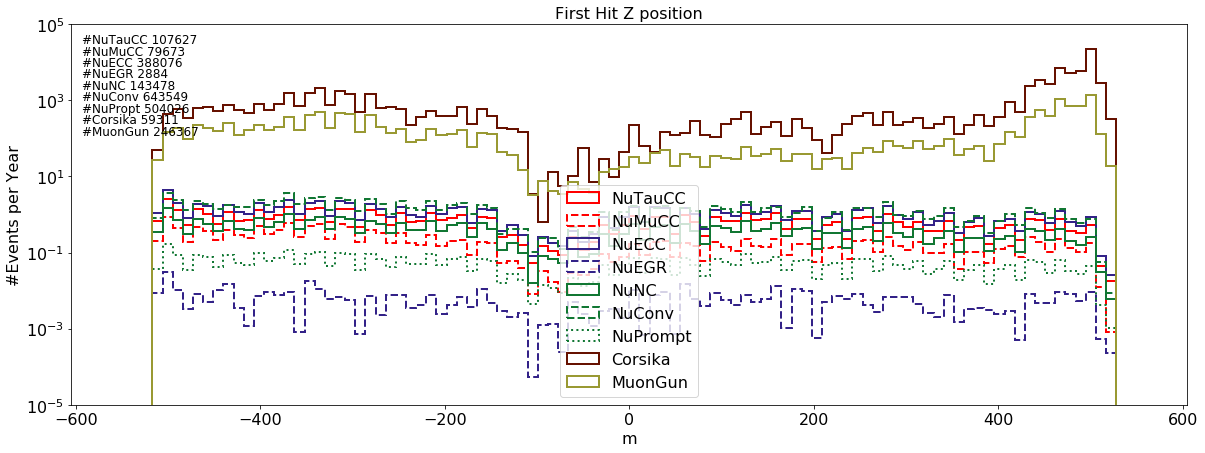

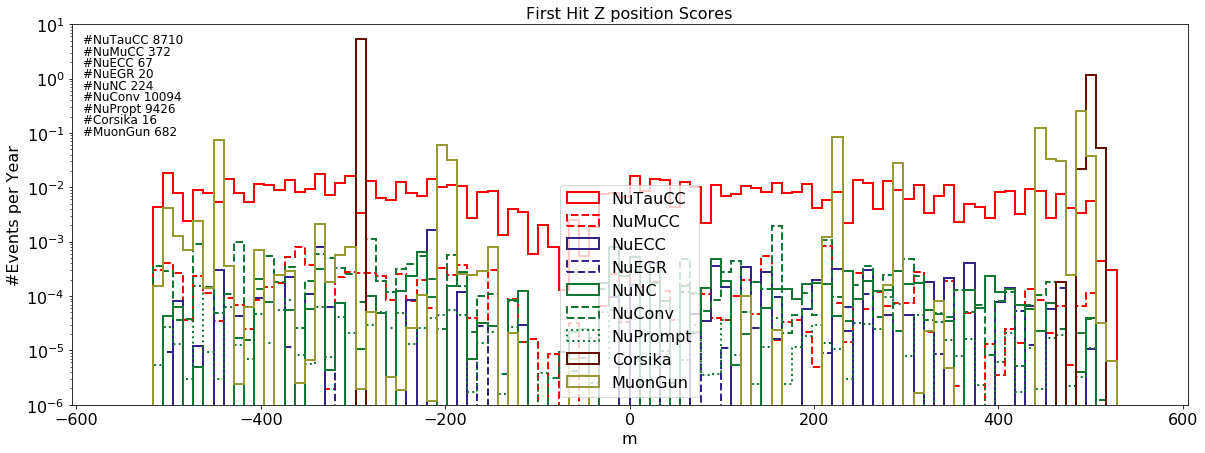

In [26]:
Zpos = 475
PlotHist("First Hit Z position", "m", data_tc['logan_veto']['FirstHitZ'],data_mc['logan_veto']['FirstHitZ'],\
         data_ec['logan_veto']['FirstHitZ'],data_eg['logan_veto']['FirstHitZ'],data_n['logan_veto']['FirstHitZ'],\
         data_ac['logan_veto']['FirstHitZ'],data_ap['logan_veto']['FirstHitZ'],data_c['logan_veto']['FirstHitZ'],\
         data_g['logan_veto']['FirstHitZ'],data_tc[weight_name][wtype],data_mc[weight_name][wtype],data_ec[weight_name][wtype],\
         data_eg[weight_name][wtype],data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],\
         data_c[weight_name_c],data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],b =100, r=[-550,550])

PlotHist("First Hit Z position Scores", "m", data_tc['logan_veto']['FirstHitZ'][mask0_tc],data_mc['logan_veto']['FirstHitZ'][mask0_mc],\
         data_ec['logan_veto']['FirstHitZ'][mask0_ec],data_eg['logan_veto']['FirstHitZ'][mask0_eg],data_n['logan_veto']['FirstHitZ'][mask0_n],\
         data_ac['logan_veto']['FirstHitZ'][mask0_ac],data_ap['logan_veto']['FirstHitZ'][mask0_ap],data_c['logan_veto']['FirstHitZ'][mask0_c],\
         data_g['logan_veto']['FirstHitZ'][mask0_g],data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],\
         data_ec[weight_name][wtype][mask0_ec],data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],\
         data_ac[weight_name_c][mask0_ac],data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],\
         data_g[weight_name_c][mask0_g],secs_per_year,ylims=[10**(-6),10**(1)],b =100,r=[-550,550])

maskz_tc = data_tc['logan_veto']['FirstHitZ'] < Zpos
maskz_mc = data_mc['logan_veto']['FirstHitZ'] < Zpos
maskz_ec = data_ec['logan_veto']['FirstHitZ'] < Zpos
maskz_eg = data_eg['logan_veto']['FirstHitZ'] < Zpos
maskz_n = data_n['logan_veto']['FirstHitZ'] < Zpos
maskz_ac = data_ac['logan_veto']['FirstHitZ'] < Zpos
maskz_ap = data_ap['logan_veto']['FirstHitZ'] < Zpos
maskz_c = data_c['logan_veto']['FirstHitZ'] < Zpos
maskz_g = data_g['logan_veto']['FirstHitZ'] < Zpos
maskz_b = data_b['logan_veto']['FirstHitZ'] < Zpos

GetRates("Rates after Zpos cut",secs_per_year,data_tc[maskz_tc],data_mc[maskz_mc],\
         data_ec[maskz_ec],data_eg[maskz_eg],data_n[maskz_n],data_ac[maskz_ac],\
         data_ap[maskz_ap ],data_c[maskz_c],data_g[maskz_g],data_b[maskz_b])

GetRates("Rates after NET1 and NET3 and Zpos cut",secs_per_year,data_tc[maskz_tc & mask0_tc],data_mc[maskz_mc & mask0_mc],\
         data_ec[maskz_ec & mask0_ec],data_eg[maskz_eg & mask0_eg],data_n[maskz_n & mask0_n],data_ac[maskz_ac & mask0_ac],\
         data_ap[maskz_ap & mask0_ap],data_c[maskz_c & mask0_c],data_g[maskz_g & mask0_g],data_b[maskz_b & mask0_b])

Rates after Qtot cut
NuTauCC = 64.266 +/- 0.334
NuMuCC = 18.167 +/- 0.119
NuECC =  100.872 +/- 0.290
NuEGR =  0.543 +/- 0.024
NuNC =   36.735 +/- 0.198
NuConv =   121.811 +/- 1.379
NuPrompt =   4.905 +/- 0.016
Corsika =   93384.272 +/- 1341.282
MuonGun =   14380.932 +/- 55.280
Rates after Rates after NET1 and NET3 and Qtot cut
NuTauCC = 0.723 +/- 0.015
NuMuCC = 0.013 +/- 0.002
NuECC =  0.008 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.010 +/- 0.001
NuConv =   0.019 +/- 0.003
NuPrompt =   0.002 +/- 0.000
Corsika =   6.674 +/- 5.550
MuonGun =   0.785 +/- 0.235


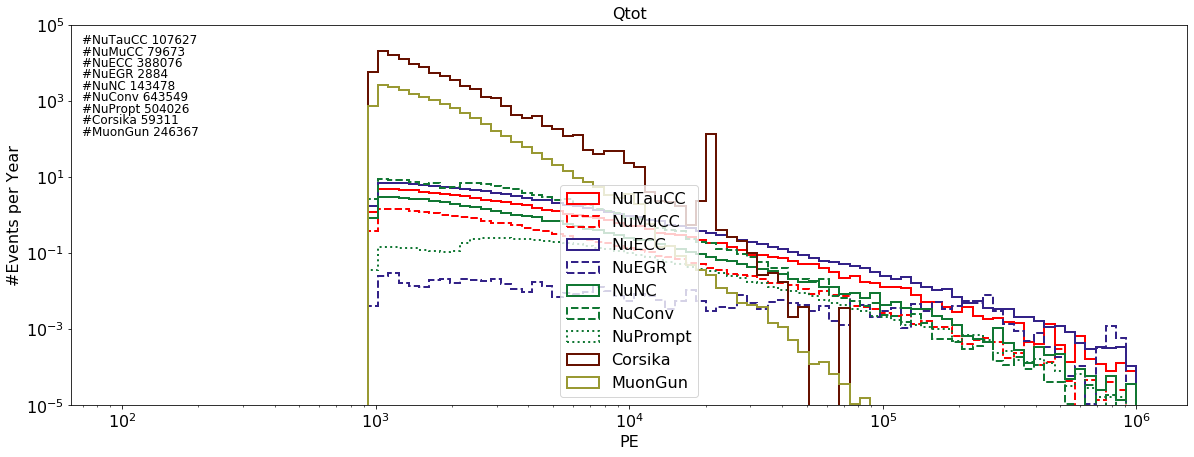

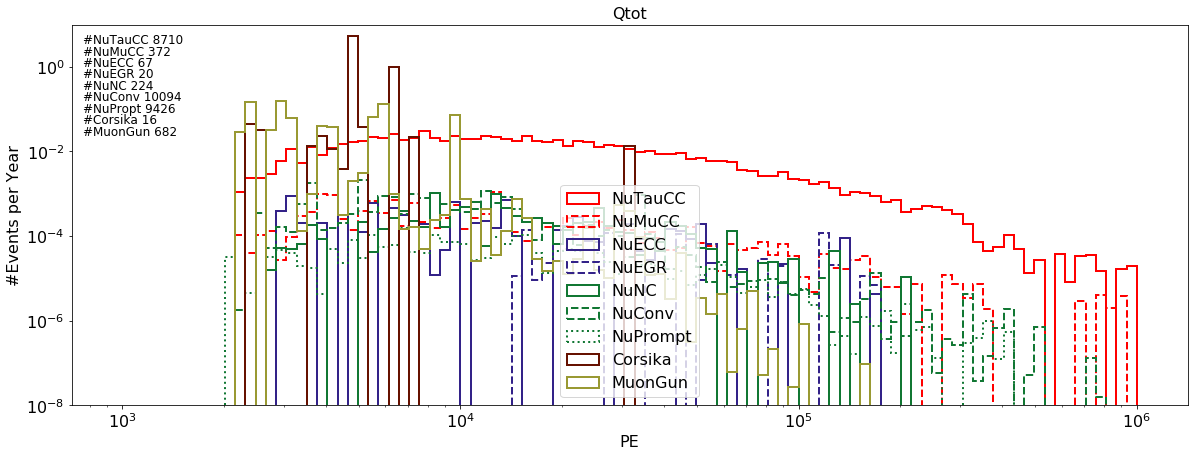

In [27]:
Qt = 1000
PlotHist("Qtot", "PE", data_tc['qtot'],data_mc['qtot'],data_ec['qtot'],data_eg['qtot'],data_n['qtot'],\
         data_ac['qtot'],data_ap['qtot'],data_c['qtot'],data_g['qtot'],data_tc[weight_name][wtype],\
         data_mc[weight_name][wtype],data_ec[weight_name][wtype],\
         data_eg[weight_name][wtype],data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],\
         data_c[weight_name_c],data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],\
         b =np.logspace(np.log10(100),np.log10(1000000),100),xscale ='log')

PlotHist("Qtot", "PE", data_tc['qtot'][mask0_tc],data_mc['qtot'][mask0_mc],\
         data_ec['qtot'][mask0_ec],data_eg['qtot'][mask0_eg],data_n['qtot'][mask0_n],\
         data_ac['qtot'][mask0_ac],data_ap['qtot'][mask0_ap],data_c['qtot'][mask0_c],\
         data_g['qtot'][mask0_g],data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],\
         data_ec[weight_name][wtype][mask0_ec],data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],\
         data_ac[weight_name_c][mask0_ac],data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],\
         data_g[weight_name_c][mask0_g],secs_per_year,ylims=[10**(-8),10**(1)],\
         b =np.logspace(np.log10(1000),np.log10(1000000),100),xscale ='log')

maskqt_tc = data_tc['qtot'] > Qt
maskqt_mc = data_mc['qtot'] > Qt
maskqt_ec = data_ec['qtot'] > Qt
maskqt_eg = data_eg['qtot'] > Qt
maskqt_n = data_n['qtot'] > Qt
maskqt_ac = data_ac['qtot'] > Qt
maskqt_ap = data_ap['qtot'] > Qt
maskqt_c = data_c['qtot'] > Qt
maskqt_g = data_g['qtot'] > Qt
maskqt_b = data_b['qtot'] > Qt

GetRates("Rates after Qtot cut",secs_per_year,data_tc[maskqt_tc],data_mc[maskqt_mc],\
         data_ec[maskqt_ec],data_eg[maskqt_eg],data_n[maskqt_n],data_ac[maskqt_ac],\
         data_ap[maskqt_ap ],data_c[maskqt_c],data_g[maskqt_g],data_b[maskqt_b])

GetRates("Rates after Rates after NET1 and NET3 and Qtot cut",secs_per_year,data_tc[maskqt_tc & mask0_tc],data_mc[maskqt_mc & mask0_mc],\
         data_ec[maskqt_ec & mask0_ec],data_eg[maskqt_eg & mask0_eg],data_n[maskqt_n & mask0_n],data_ac[maskqt_ac & mask0_ac],\
         data_ap[maskqt_ap & mask0_ap],data_c[maskqt_c & mask0_c],data_g[maskqt_g & mask0_g],data_b[maskqt_b & mask0_b])

Rates after Qst0 cut
NuTauCC = 43.351 +/- 0.269
NuMuCC = 11.555 +/- 0.095
NuECC =  68.410 +/- 0.233
NuEGR =  0.442 +/- 0.021
NuNC =   24.182 +/- 0.158
NuConv =   89.589 +/- 1.127
NuPrompt =   4.286 +/- 0.015
Corsika =   65864.454 +/- 1168.749
MuonGun =   9499.682 +/- 47.632
Rates after Rates after NET1 and NET3 and Qst0 cut
NuTauCC = 0.723 +/- 0.015
NuMuCC = 0.013 +/- 0.002
NuECC =  0.008 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.010 +/- 0.001
NuConv =   0.019 +/- 0.003
NuPrompt =   0.002 +/- 0.000
Corsika =   6.674 +/- 5.550
MuonGun =   0.785 +/- 0.235


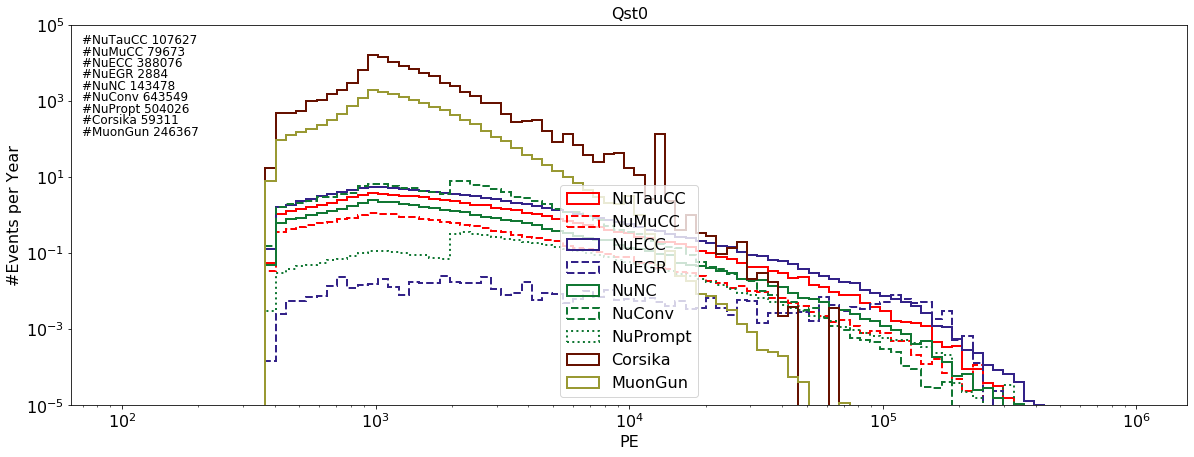

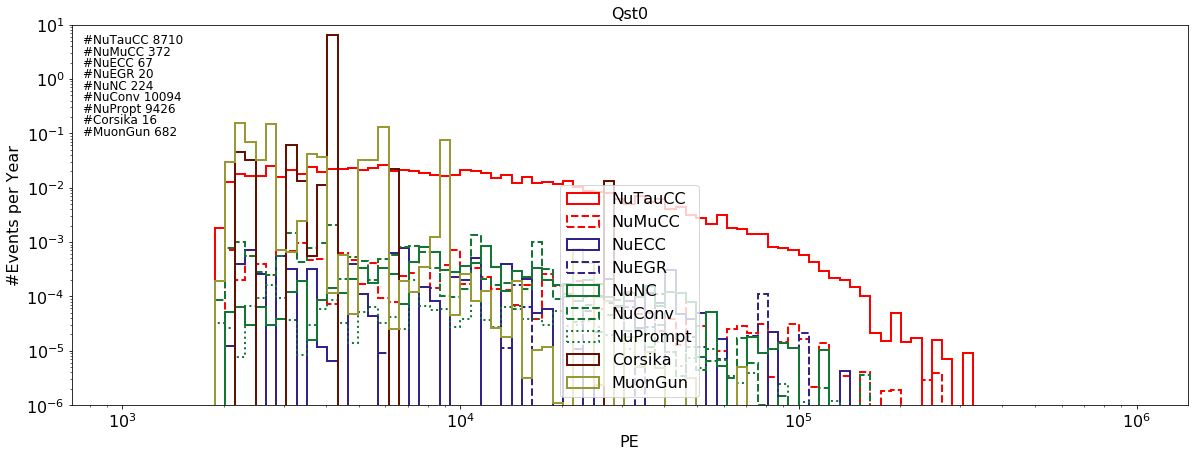

In [28]:
Qst0 = 1000

PlotHist("Qst0", "PE", data_tc['qst']['q'][:,0],data_mc['qst']['q'][:,0],data_ec['qst']['q'][:,0],data_eg['qst']['q'][:,0],\
         data_n['qst']['q'][:,0],data_ac['qst']['q'][:,0],data_ap['qst']['q'][:,0],data_c['qst']['q'][:,0],data_g['qst']['q'][:,0],\
         data_tc[weight_name][wtype],data_mc[weight_name][wtype],data_ec[weight_name][wtype],\
         data_eg[weight_name][wtype],data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],\
         data_c[weight_name_c],data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],\
         b =np.logspace(np.log10(100),np.log10(1000000),100),xscale ='log')

PlotHist("Qst0", "PE", data_tc['qst']['q'][:,0][mask0_tc],data_mc['qst']['q'][:,0][mask0_mc],\
         data_ec['qst']['q'][:,0][mask0_ec],data_eg['qst']['q'][:,0][mask0_eg],data_n['qst']['q'][:,0][mask0_n],\
         data_ac['qst']['q'][:,0][mask0_ac],data_ap['qst']['q'][:,0][mask0_ap],data_c['qst']['q'][:,0][mask0_c],\
         data_g['qst']['q'][:,0][mask0_g],data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],\
         data_ec[weight_name][wtype][mask0_ec],data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],\
         data_ac[weight_name_c][mask0_ac],data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],\
         data_g[weight_name_c][mask0_g],secs_per_year,ylims=[10**(-6),10**(1)],\
         b =np.logspace(np.log10(1000),np.log10(1000000),100),xscale ='log')

maskq0_tc = data_tc['qst']['q'][:,0] > Qst0
maskq0_mc = data_mc['qst']['q'][:,0] > Qst0
maskq0_ec = data_ec['qst']['q'][:,0] > Qst0
maskq0_eg = data_eg['qst']['q'][:,0] > Qst0
maskq0_n = data_n['qst']['q'][:,0] > Qst0
maskq0_ac = data_ac['qst']['q'][:,0] > Qst0
maskq0_ap = data_ap['qst']['q'][:,0] > Qst0
maskq0_c = data_c['qst']['q'][:,0] > Qst0
maskq0_g = data_g['qst']['q'][:,0] > Qst0
maskq0_b = data_b['qst']['q'][:,0] > Qst0

GetRates("Rates after Qst0 cut",secs_per_year,data_tc[maskq0_tc],data_mc[maskq0_mc],\
         data_ec[maskq0_ec],data_eg[maskq0_eg],data_n[maskq0_n],data_ac[maskq0_ac],\
         data_ap[maskq0_ap],data_c[maskq0_c],data_g[maskq0_g],data_b[maskq0_b])

GetRates("Rates after Rates after NET1 and NET3 and Qst0 cut",secs_per_year,data_tc[maskq0_tc & mask0_tc],data_mc[maskq0_mc & mask0_mc],\
         data_ec[maskq0_ec & mask0_ec],data_eg[maskq0_eg & mask0_eg],data_n[maskq0_n & mask0_n],data_ac[maskq0_ac & mask0_ac],\
         data_ap[maskq0_ap & mask0_ap],data_c[maskq0_c & mask0_c],data_g[maskq0_g & mask0_g],data_b[maskq0_b & mask0_b])

Rates after Qst1 cut
NuTauCC = 61.987 +/- 0.326
NuMuCC = 17.529 +/- 0.115
NuECC =  98.284 +/- 0.286
NuEGR =  0.537 +/- 0.024
NuNC =   35.081 +/- 0.192
NuConv =   113.411 +/- 1.305
NuPrompt =   4.737 +/- 0.015
Corsika =   68062.030 +/- 1060.524
MuonGun =   11903.793 +/- 46.380
Rates after Rates after NET1 and NET3 and Qst1 cut
NuTauCC = 0.723 +/- 0.015
NuMuCC = 0.013 +/- 0.002
NuECC =  0.008 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.010 +/- 0.001
NuConv =   0.019 +/- 0.003
NuPrompt =   0.002 +/- 0.000
Corsika =   6.674 +/- 5.550
MuonGun =   0.785 +/- 0.235


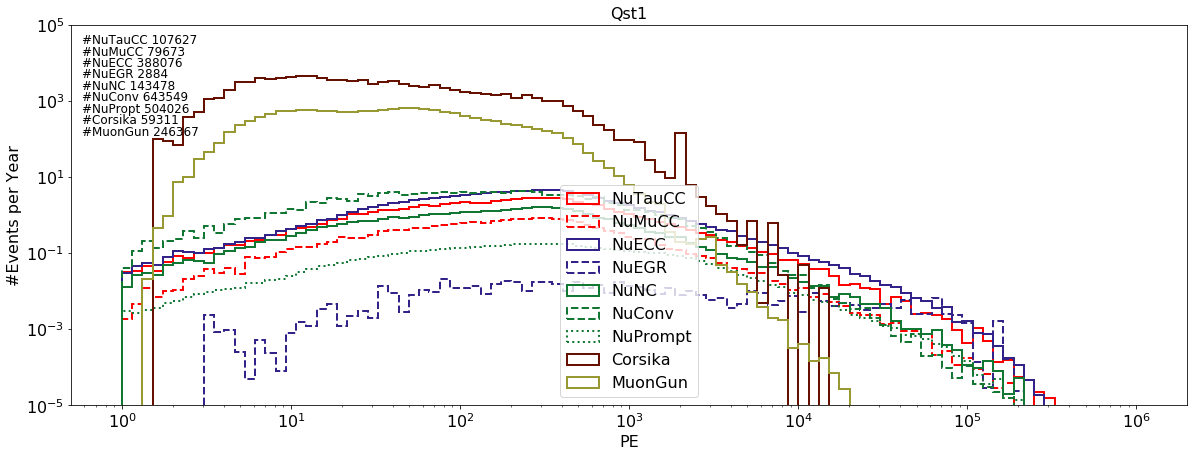

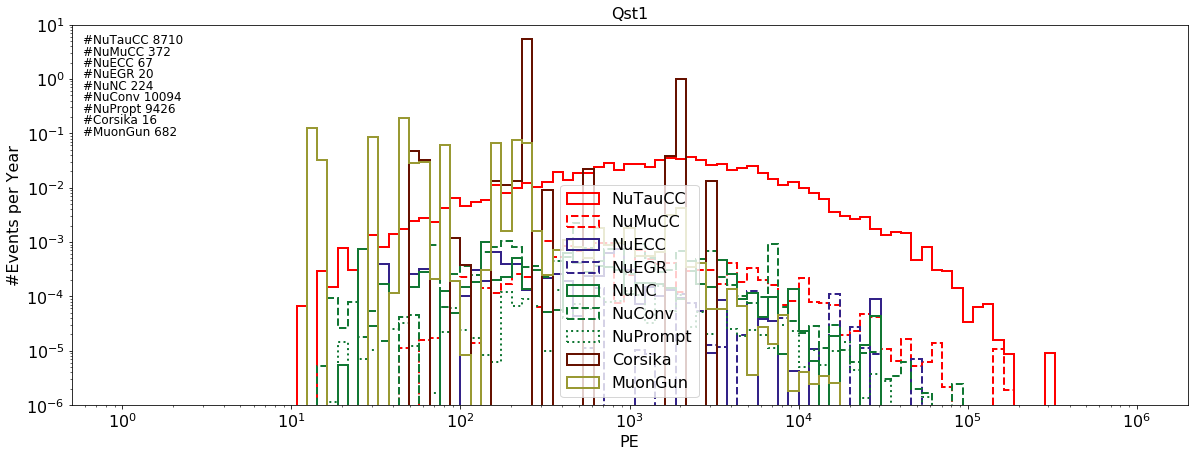

In [30]:
Qst1 = 10

PlotHist("Qst1", "PE", data_tc['qst']['q'][:,1],data_mc['qst']['q'][:,1],data_ec['qst']['q'][:,1],data_eg['qst']['q'][:,1],\
         data_n['qst']['q'][:,1],data_ac['qst']['q'][:,1],data_ap['qst']['q'][:,1],data_c['qst']['q'][:,1],data_g['qst']['q'][:,1],\
         data_tc[weight_name][wtype],data_mc[weight_name][wtype],data_ec[weight_name][wtype],\
         data_eg[weight_name][wtype],data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],\
         data_c[weight_name_c],data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],\
         b =np.logspace(np.log10(1),np.log10(1000000),100),xscale ='log')

PlotHist("Qst1", "PE", data_tc['qst']['q'][:,1][mask0_tc],data_mc['qst']['q'][:,1][mask0_mc],\
         data_ec['qst']['q'][:,1][mask0_ec],data_eg['qst']['q'][:,1][mask0_eg],data_n['qst']['q'][:,1][mask0_n],\
         data_ac['qst']['q'][:,1][mask0_ac],data_ap['qst']['q'][:,1][mask0_ap],data_c['qst']['q'][:,1][mask0_c],\
         data_g['qst']['q'][:,1][mask0_g],data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],\
         data_ec[weight_name][wtype][mask0_ec],data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],\
         data_ac[weight_name_c][mask0_ac],data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],\
         data_g[weight_name_c][mask0_g],secs_per_year,ylims=[10**(-6),10**(1)],\
         b =np.logspace(np.log10(1),np.log10(1000000),100),xscale ='log')

maskq1_tc = data_tc['qst']['q'][:,1] > Qst1
maskq1_mc = data_mc['qst']['q'][:,1] > Qst1
maskq1_ec = data_ec['qst']['q'][:,1] > Qst1
maskq1_eg = data_eg['qst']['q'][:,1] > Qst1
maskq1_n = data_n['qst']['q'][:,1] > Qst1
maskq1_ac = data_ac['qst']['q'][:,1] > Qst1
maskq1_ap = data_ap['qst']['q'][:,1] > Qst1
maskq1_c = data_c['qst']['q'][:,1] > Qst1
maskq1_g = data_g['qst']['q'][:,1] > Qst1
maskq1_b = data_b['qst']['q'][:,1] > Qst1

GetRates("Rates after Qst1 cut",secs_per_year,data_tc[maskq1_tc],data_mc[maskq1_mc],\
         data_ec[maskq1_ec],data_eg[maskq1_eg],data_n[maskq1_n],data_ac[maskq1_ac],\
         data_ap[maskq1_ap],data_c[maskq1_c],data_g[maskq1_g],data_b[maskq1_b])

GetRates("Rates after Rates after NET1 and NET3 and Qst1 cut",secs_per_year,data_tc[maskq1_tc & mask0_tc],data_mc[maskq1_mc & mask0_mc],\
         data_ec[maskq1_ec & mask0_ec],data_eg[maskq1_eg & mask0_eg],data_n[maskq1_n & mask0_n],data_ac[maskq1_ac & mask0_ac],\
         data_ap[maskq1_ap & mask0_ap],data_c[maskq1_c & mask0_c],data_g[maskq1_g & mask0_g],data_b[maskq1_b & mask0_b])

Rates after Qst2 cut
NuTauCC = 60.426 +/- 0.321
NuMuCC = 16.963 +/- 0.112
NuECC =  96.269 +/- 0.282
NuEGR =  0.532 +/- 0.024
NuNC =   33.949 +/- 0.188
NuConv =   108.136 +/- 1.264
NuPrompt =   4.631 +/- 0.015
Corsika =   50604.794 +/- 820.740
MuonGun =   9981.619 +/- 39.009
Rates after Rates after NET1 and NET3 and Qst2 cut
NuTauCC = 0.723 +/- 0.015
NuMuCC = 0.013 +/- 0.002
NuECC =  0.008 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.010 +/- 0.001
NuConv =   0.019 +/- 0.003
NuPrompt =   0.002 +/- 0.000
Corsika =   6.674 +/- 5.550
MuonGun =   0.785 +/- 0.235


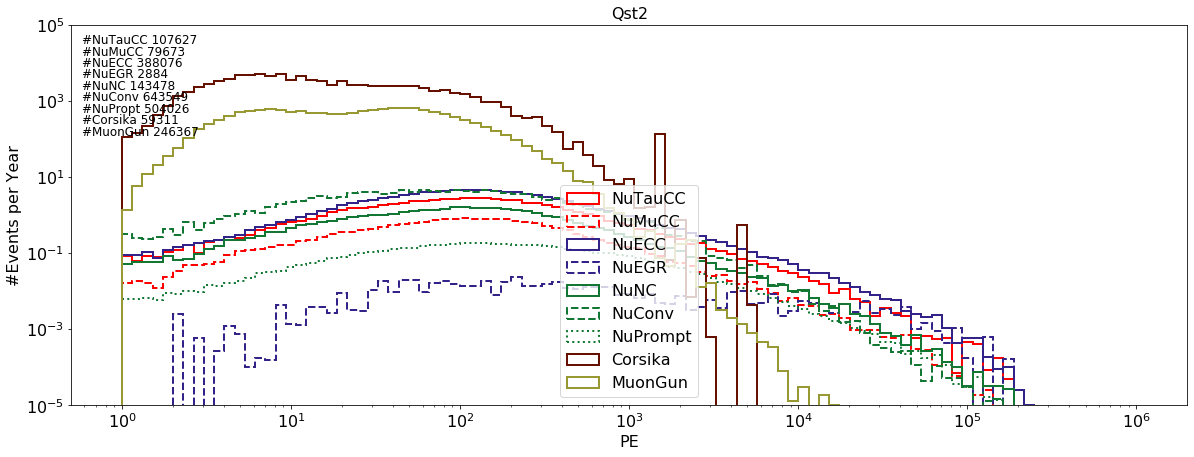

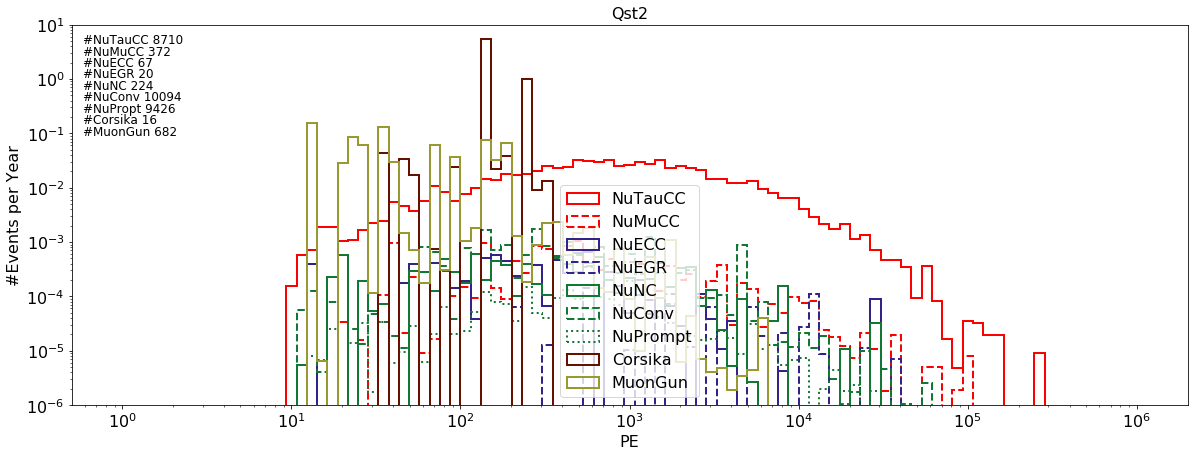

In [31]:
Qst2 = 10

PlotHist("Qst2", "PE", data_tc['qst']['q'][:,2],data_mc['qst']['q'][:,2],data_ec['qst']['q'][:,2],data_eg['qst']['q'][:,2],\
         data_n['qst']['q'][:,2],data_ac['qst']['q'][:,2],data_ap['qst']['q'][:,2],data_c['qst']['q'][:,2],data_g['qst']['q'][:,2],\
         data_tc[weight_name][wtype],data_mc[weight_name][wtype],data_ec[weight_name][wtype],\
         data_eg[weight_name][wtype],data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],\
         data_c[weight_name_c],data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],\
         b =np.logspace(np.log10(1),np.log10(1000000),100),xscale ='log')

PlotHist("Qst2", "PE", data_tc['qst']['q'][:,2][mask0_tc],data_mc['qst']['q'][:,2][mask0_mc],\
         data_ec['qst']['q'][:,2][mask0_ec],data_eg['qst']['q'][:,2][mask0_eg],data_n['qst']['q'][:,2][mask0_n],\
         data_ac['qst']['q'][:,2][mask0_ac],data_ap['qst']['q'][:,2][mask0_ap],data_c['qst']['q'][:,2][mask0_c],\
         data_g['qst']['q'][:,2][mask0_g],data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],\
         data_ec[weight_name][wtype][mask0_ec],data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],\
         data_ac[weight_name_c][mask0_ac],data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],\
         data_g[weight_name_c][mask0_g],secs_per_year,ylims=[10**(-6),10**(1)],\
         b =np.logspace(np.log10(1),np.log10(1000000),100),xscale ='log')

maskq2_tc = data_tc['qst']['q'][:,2] > Qst2
maskq2_mc = data_mc['qst']['q'][:,2] > Qst2
maskq2_ec = data_ec['qst']['q'][:,2] > Qst2
maskq2_eg = data_eg['qst']['q'][:,2] > Qst2
maskq2_n = data_n['qst']['q'][:,2] > Qst2
maskq2_ac = data_ac['qst']['q'][:,2] > Qst2
maskq2_ap = data_ap['qst']['q'][:,2] > Qst2
maskq2_c = data_c['qst']['q'][:,2] > Qst2
maskq2_g = data_g['qst']['q'][:,2] > Qst2
maskq2_b = data_b['qst']['q'][:,2] > Qst2

GetRates("Rates after Qst2 cut",secs_per_year,data_tc[maskq2_tc],data_mc[maskq2_mc],\
         data_ec[maskq2_ec],data_eg[maskq2_eg],data_n[maskq2_n],data_ac[maskq2_ac],\
         data_ap[maskq2_ap],data_c[maskq2_c],data_g[maskq2_g],data_b[maskq2_b])

GetRates("Rates after Rates after NET1 and NET3 and Qst2 cut",secs_per_year,data_tc[maskq2_tc & mask0_tc],data_mc[maskq2_mc & mask0_mc],\
         data_ec[maskq2_ec & mask0_ec],data_eg[maskq2_eg & mask0_eg],data_n[maskq2_n & mask0_n],data_ac[maskq2_ac & mask0_ac],\
         data_ap[maskq2_ap & mask0_ap],data_c[maskq2_c & mask0_c],data_g[maskq2_g & mask0_g],data_b[maskq2_b & mask0_b])

Rates after LLH cut
NuTauCC = 64.266 +/- 0.334
NuMuCC = 18.167 +/- 0.119
NuECC =  100.872 +/- 0.290
NuEGR =  0.543 +/- 0.024
NuNC =   36.736 +/- 0.198
NuConv =   121.811 +/- 1.379
NuPrompt =   4.905 +/- 0.016
Corsika =   93385.067 +/- 1341.282
MuonGun =   14381.911 +/- 55.283
Rates after NET1 and NET3 and LLH cut
NuTauCC = 0.723 +/- 0.015
NuMuCC = 0.013 +/- 0.002
NuECC =  0.008 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.010 +/- 0.001
NuConv =   0.019 +/- 0.003
NuPrompt =   0.002 +/- 0.000
Corsika =   6.674 +/- 5.550
MuonGun =   0.785 +/- 0.235


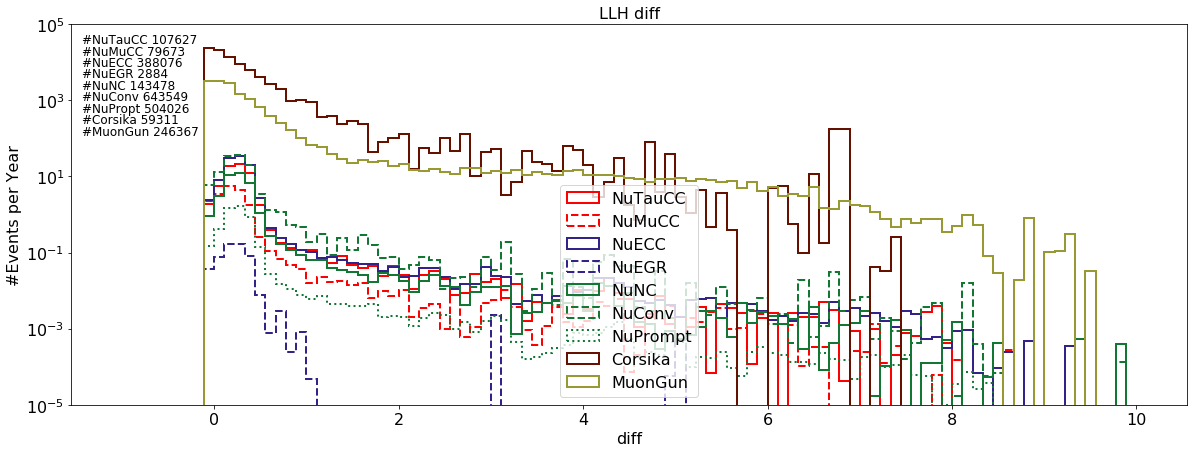

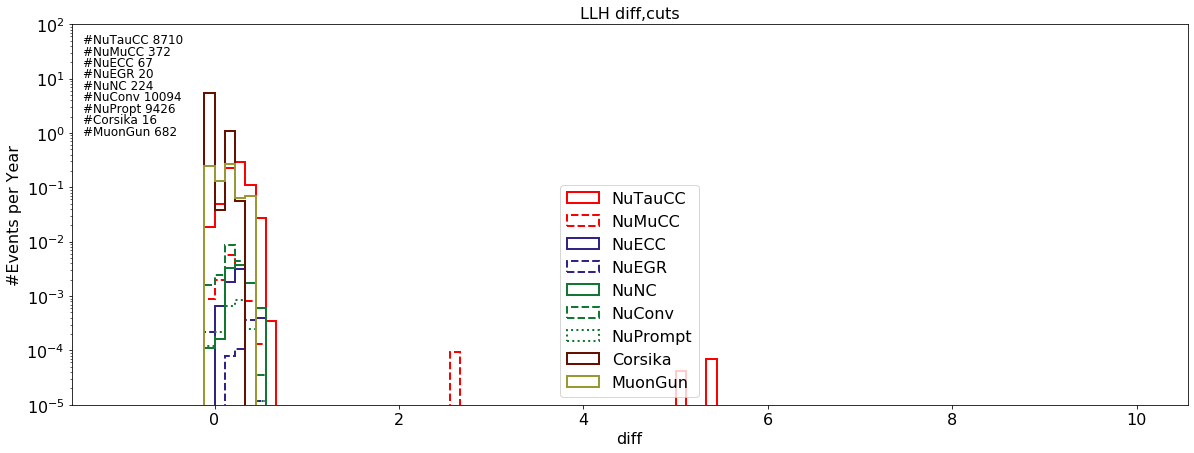

In [34]:
LLH = -0.1

PlotHist("LLH diff", "diff", data_tc['logan_veto']['SPE_rlogl']-data_tc['logan_veto']['Cascade_rlogl'],\
         data_mc['logan_veto']['SPE_rlogl']-data_mc['logan_veto']['Cascade_rlogl'],\
         data_ec['logan_veto']['SPE_rlogl']-data_ec['logan_veto']['Cascade_rlogl'],\
         data_eg['logan_veto']['SPE_rlogl']-data_eg['logan_veto']['Cascade_rlogl'],\
         data_n['logan_veto']['SPE_rlogl']-data_n['logan_veto']['Cascade_rlogl'],\
         data_ac['logan_veto']['SPE_rlogl']-data_ac['logan_veto']['Cascade_rlogl'],\
         data_ap['logan_veto']['SPE_rlogl']-data_ap['logan_veto']['Cascade_rlogl'],\
         data_c['logan_veto']['SPE_rlogl']-data_c['logan_veto']['Cascade_rlogl'],\
         data_g['logan_veto']['SPE_rlogl']-data_g['logan_veto']['Cascade_rlogl'],\
         data_tc[weight_name][wtype],data_mc[weight_name][wtype],data_ec[weight_name][wtype],data_eg[weight_name][wtype],\
         data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],data_c[weight_name_c],\
         data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],b =np.linspace(-1,10,100),xscale ='linear')

PlotHist("LLH diff,cuts", "diff", data_tc['logan_veto']['SPE_rlogl'][mask0_tc]-data_tc['logan_veto']['Cascade_rlogl'][mask0_tc],\
         data_mc['logan_veto']['SPE_rlogl'][mask0_mc]-data_mc['logan_veto']['Cascade_rlogl'][mask0_mc],\
         data_ec['logan_veto']['SPE_rlogl'][mask0_ec]-data_ec['logan_veto']['Cascade_rlogl'][mask0_ec],\
         data_eg['logan_veto']['SPE_rlogl'][mask0_eg]-data_eg['logan_veto']['Cascade_rlogl'][mask0_eg],\
         data_n['logan_veto']['SPE_rlogl'][mask0_n]-data_n['logan_veto']['Cascade_rlogl'][mask0_n],\
         data_ac['logan_veto']['SPE_rlogl'][mask0_ac]-data_ac['logan_veto']['Cascade_rlogl'][mask0_ac],\
         data_ap['logan_veto']['SPE_rlogl'][mask0_ap]-data_ap['logan_veto']['Cascade_rlogl'][mask0_ap],\
         data_c['logan_veto']['SPE_rlogl'][mask0_c]-data_c['logan_veto']['Cascade_rlogl'][mask0_c],\
         data_g['logan_veto']['SPE_rlogl'][mask0_g]-data_g['logan_veto']['Cascade_rlogl'][mask0_g],\
         data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],data_ec[weight_name][wtype][mask0_ec],\
         data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],data_ac[weight_name_c][mask0_ac],\
         data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],data_g[weight_name_c][mask0_g],\
         secs_per_year,ylims=[10**(-5),10**(2)],b =np.linspace(-1,10,100),xscale ='linear')

maskl_tc = data_tc['logan_veto']['SPE_rlogl']-data_tc['logan_veto']['Cascade_rlogl'] > LLH
maskl_mc = data_mc['logan_veto']['SPE_rlogl']-data_mc['logan_veto']['Cascade_rlogl'] > LLH
maskl_ec = data_ec['logan_veto']['SPE_rlogl']-data_ec['logan_veto']['Cascade_rlogl'] > LLH
maskl_eg = data_eg['logan_veto']['SPE_rlogl']-data_eg['logan_veto']['Cascade_rlogl'] > LLH
maskl_n = data_n['logan_veto']['SPE_rlogl']-data_n['logan_veto']['Cascade_rlogl'] > LLH
maskl_ac = data_ac['logan_veto']['SPE_rlogl']-data_ac['logan_veto']['Cascade_rlogl'] > LLH
maskl_ap = data_ap['logan_veto']['SPE_rlogl']-data_ap['logan_veto']['Cascade_rlogl'] > LLH
maskl_c = data_c['logan_veto']['SPE_rlogl']-data_c['logan_veto']['Cascade_rlogl'] > LLH
maskl_g = data_g['logan_veto']['SPE_rlogl']-data_g['logan_veto']['Cascade_rlogl'] > LLH
maskl_b = data_b['logan_veto']['SPE_rlogl']-data_b['logan_veto']['Cascade_rlogl'] > LLH

GetRates("Rates after LLH cut",secs_per_year,data_tc[maskl_tc],data_mc[maskl_mc],\
         data_ec[maskl_ec],data_eg[maskl_eg],data_n[maskl_n],data_ac[maskl_ac],\
         data_ap[maskl_ap],data_c[maskl_c],data_g[maskl_g],data_b[maskl_b])

GetRates("Rates after NET1 and NET3 and LLH cut",secs_per_year,data_tc[maskl_tc & mask0_tc],data_mc[maskl_mc & mask0_mc],\
         data_ec[maskl_ec & mask0_ec],data_eg[maskl_eg & mask0_eg],data_n[maskl_n & mask0_n],data_ac[maskl_ac & mask0_ac],\
         data_ap[maskl_ap & mask0_ap],data_c[maskl_c & mask0_c],data_g[maskl_g & mask0_g],data_b[maskl_b & mask0_b])

Rates after NET1 cut
NuTauCC = 1.118 +/- 0.020
NuMuCC = 0.553 +/- 0.015
NuECC =  0.021 +/- 0.003
NuEGR =  0.003 +/- 0.001
NuNC =   0.019 +/- 0.002
NuConv =   0.488 +/- 0.027
NuPrompt =   0.021 +/- 0.001
Corsika =   14374.912 +/- 328.893
MuonGun =   766.393 +/- 9.320
Rates after Rates after NET1 and NET3 cut
NuTauCC = 0.815 +/- 0.016
NuMuCC = 0.017 +/- 0.002
NuECC =  0.010 +/- 0.002
NuEGR =  0.001 +/- 0.000
NuNC =   0.011 +/- 0.001
NuConv =   0.019 +/- 0.003
NuPrompt =   0.002 +/- 0.000
Corsika =   9.464 +/- 5.703
MuonGun =   4.234 +/- 0.578


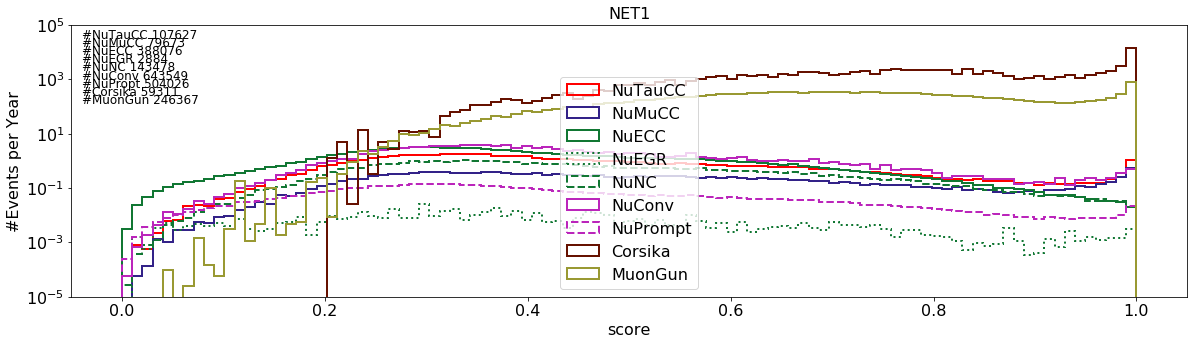

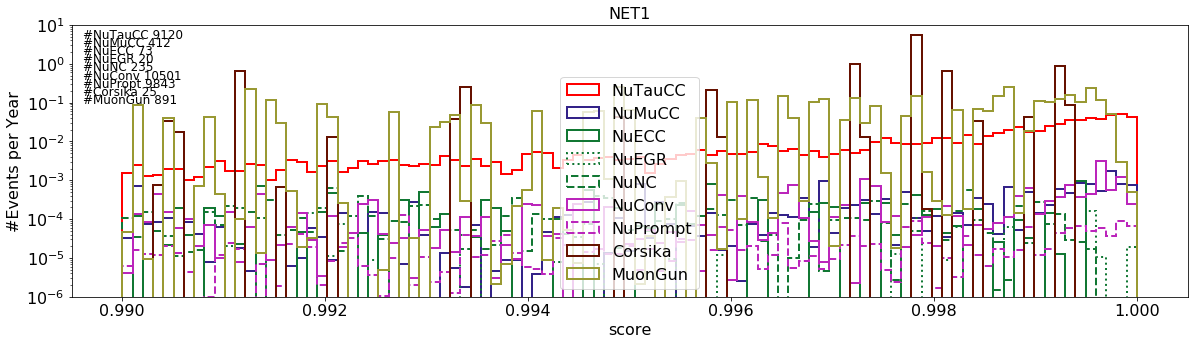

In [68]:
NET1 = 0.99

PlotHist("NET1", "score", data_tc['preds']['n1'],data_mc['preds']['n1'],data_ec['preds']['n1'],data_eg['preds']['n1'],\
         data_n['preds']['n1'],data_ac['preds']['n1'],data_ap['preds']['n1'],data_c['preds']['n1'],data_g['preds']['n1'],\
         data_tc[weight_name][wtype],data_mc[weight_name][wtype],data_ec[weight_name][wtype],\
         data_eg[weight_name][wtype],data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],\
         data_c[weight_name_c],data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],\
         b =np.linspace(0,1,100),xscale ='linear')

PlotHist("NET1", "score", data_tc['preds']['n1'][mask0_tc],data_mc['preds']['n1'][mask0_mc],\
         data_ec['preds']['n1'][mask0_ec],data_eg['preds']['n1'][mask0_eg],data_n['preds']['n1'][mask0_n],\
         data_ac['preds']['n1'][mask0_ac],data_ap['preds']['n1'][mask0_ap],data_c['preds']['n1'][mask0_c],\
         data_g['preds']['n1'][mask0_g],data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],\
         data_ec[weight_name][wtype][mask0_ec],data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],\
         data_ac[weight_name_c][mask0_ac],data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],\
         data_g[weight_name_c][mask0_g],secs_per_year,ylims=[10**(-6),10**(1)],\
         b =np.linspace(NET1,1,100),xscale ='linear')

maskn1_tc = data_tc['preds']['n1'] > NET1
maskn1_mc = data_mc['preds']['n1'] > NET1
maskn1_ec = data_ec['preds']['n1'] > NET1
maskn1_eg = data_eg['preds']['n1'] > NET1
maskn1_n = data_n['preds']['n1'] > NET1
maskn1_ac = data_ac['preds']['n1'] > NET1
maskn1_ap = data_ap['preds']['n1'] > NET1
maskn1_c = data_c['preds']['n1'] > NET1
maskn1_g = data_g['preds']['n1'] > NET1
maskn1_b = data_b['preds']['n1'] > NET1

GetRates("Rates after NET1 cut",secs_per_year,data_tc[maskn1_tc],data_mc[maskn1_mc],\
         data_ec[maskn1_ec],data_eg[maskn1_eg],data_n[maskn1_n],data_ac[maskn1_ac],\
         data_ap[maskn1_ap],data_c[maskn1_c],data_g[maskn1_g],data_b[maskn1_b])

GetRates("Rates after Rates after NET1 and NET3 cut",secs_per_year,data_tc[maskn1_tc & mask0_tc],data_mc[maskn1_mc & mask0_mc],\
         data_ec[maskn1_ec & mask0_ec],data_eg[maskn1_eg & mask0_eg],data_n[maskn1_n & mask0_n],data_ac[maskn1_ac & mask0_ac],\
         data_ap[maskn1_ap & mask0_ap],data_c[maskn1_c & mask0_c],data_g[maskn1_g & mask0_g],data_b[maskn1_b & mask0_b])

Rates after NET3 cut
NuTauCC = 13.969 +/- 0.129
NuMuCC = 1.730 +/- 0.032
NuECC =  21.665 +/- 0.122
NuEGR =  0.133 +/- 0.011
NuNC =   6.863 +/- 0.071
NuConv =   10.219 +/- 0.259
NuPrompt =   1.034 +/- 0.007
Corsika =   651.267 +/- 99.089
MuonGun =   234.770 +/- 5.409
Rates after Rates after NET1 and NET3 cut
NuTauCC = 0.815 +/- 0.016
NuMuCC = 0.017 +/- 0.002
NuECC =  0.010 +/- 0.002
NuEGR =  0.001 +/- 0.000
NuNC =   0.011 +/- 0.001
NuConv =   0.019 +/- 0.003
NuPrompt =   0.002 +/- 0.000
Corsika =   9.464 +/- 5.703
MuonGun =   4.234 +/- 0.578


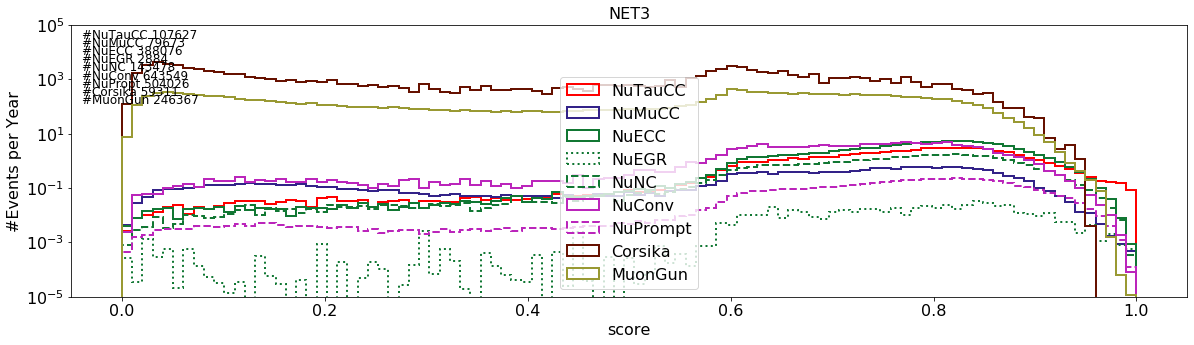

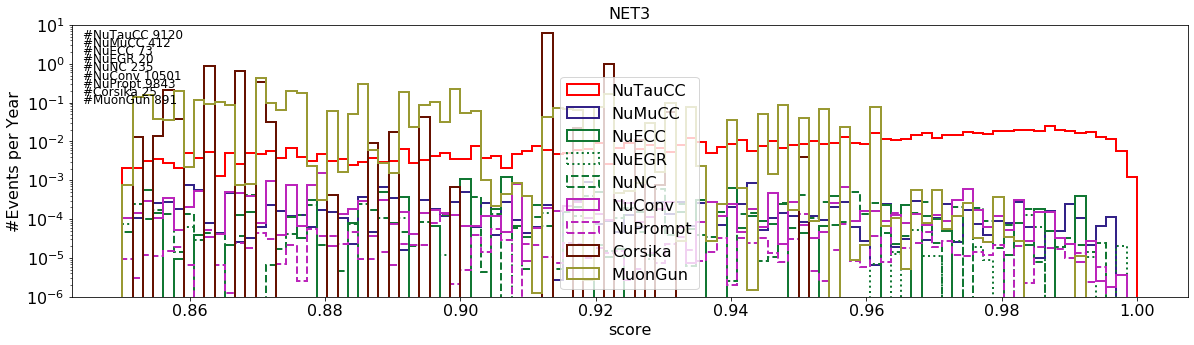

In [69]:
NET3 = 0.85

PlotHist("NET3", "score", data_tc['preds']['n3'],data_mc['preds']['n3'],data_ec['preds']['n3'],data_eg['preds']['n3'],\
         data_n['preds']['n3'],data_ac['preds']['n3'],data_ap['preds']['n3'],data_c['preds']['n3'],data_g['preds']['n3'],\
         data_tc[weight_name][wtype],data_mc[weight_name][wtype],data_ec[weight_name][wtype],\
         data_eg[weight_name][wtype],data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],\
         data_c[weight_name_c],data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],\
         b =np.linspace(0,1,100),xscale ='linear')

PlotHist("NET3", "score", data_tc['preds']['n3'][mask0_tc],data_mc['preds']['n3'][mask0_mc],\
         data_ec['preds']['n3'][mask0_ec],data_eg['preds']['n3'][mask0_eg],data_n['preds']['n3'][mask0_n],\
         data_ac['preds']['n3'][mask0_ac],data_ap['preds']['n3'][mask0_ap],data_c['preds']['n3'][mask0_c],\
         data_g['preds']['n3'][mask0_g],data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],\
         data_ec[weight_name][wtype][mask0_ec],data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],\
         data_ac[weight_name_c][mask0_ac],data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],\
         data_g[weight_name_c][mask0_g],secs_per_year,ylims=[10**(-6),10**(1)],\
         b =np.linspace(NET3,1,100),xscale ='linear')

maskn3_tc = data_tc['preds']['n3'] > NET3
maskn3_mc = data_mc['preds']['n3'] > NET3
maskn3_ec = data_ec['preds']['n3'] > NET3
maskn3_eg = data_eg['preds']['n3'] > NET3
maskn3_n = data_n['preds']['n3'] > NET3
maskn3_ac = data_ac['preds']['n3'] > NET3
maskn3_ap = data_ap['preds']['n3'] > NET3
maskn3_c = data_c['preds']['n3'] > NET3
maskn3_g = data_g['preds']['n3'] > NET3
maskn3_b = data_b['preds']['n3'] > NET3

GetRates("Rates after NET3 cut",secs_per_year,data_tc[maskn3_tc],data_mc[maskn3_mc],\
         data_ec[maskn3_ec],data_eg[maskn3_eg],data_n[maskn3_n],data_ac[maskn3_ac],\
         data_ap[maskn3_ap],data_c[maskn3_c],data_g[maskn3_g],data_b[maskn3_b])

GetRates("Rates after Rates after NET1 and NET3 cut",secs_per_year,data_tc[maskn3_tc & mask0_tc],data_mc[maskn3_mc & mask0_mc],\
         data_ec[maskn3_ec & mask0_ec],data_eg[maskn3_eg & mask0_eg],data_n[maskn3_n & mask0_n],data_ac[maskn3_ac & mask0_ac],\
         data_ap[maskn3_ap & mask0_ap],data_c[maskn3_c & mask0_c],data_g[maskn3_g & mask0_g],data_b[maskn3_b & mask0_b])

Rates after NET2 cut
NuTauCC = 42.018 +/- 0.266
NuMuCC = 10.251 +/- 0.088
NuECC =  69.252 +/- 0.237
NuEGR =  0.425 +/- 0.021
NuNC =   22.764 +/- 0.152
NuConv =   68.320 +/- 0.936
NuPrompt =   3.705 +/- 0.014
Corsika =   493.768 +/- 92.315
MuonGun =   180.514 +/- 6.007
Rates after Rates after NET1 and NET3 and NET2 cut
NuTauCC = 0.754 +/- 0.016
NuMuCC = 0.014 +/- 0.002
NuECC =  0.008 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.009 +/- 0.001
NuConv =   0.017 +/- 0.002
NuPrompt =   0.002 +/- 0.000
Corsika =   0.000 +/- 0.000
MuonGun =   0.054 +/- 0.049


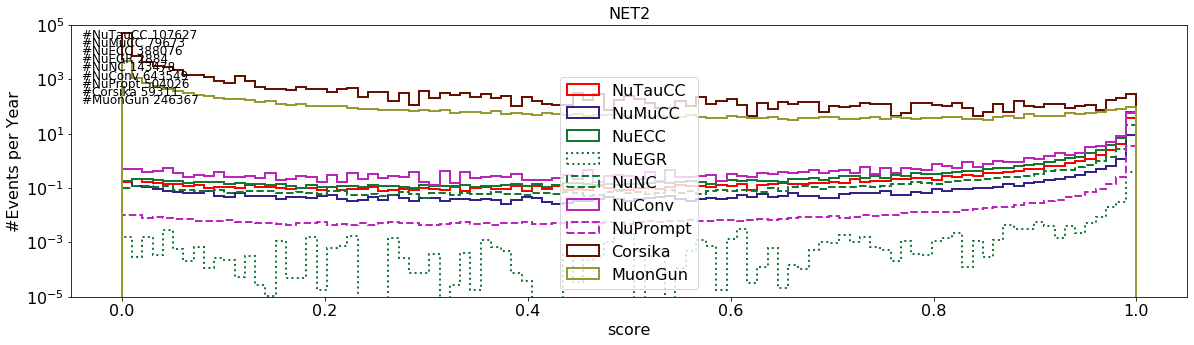

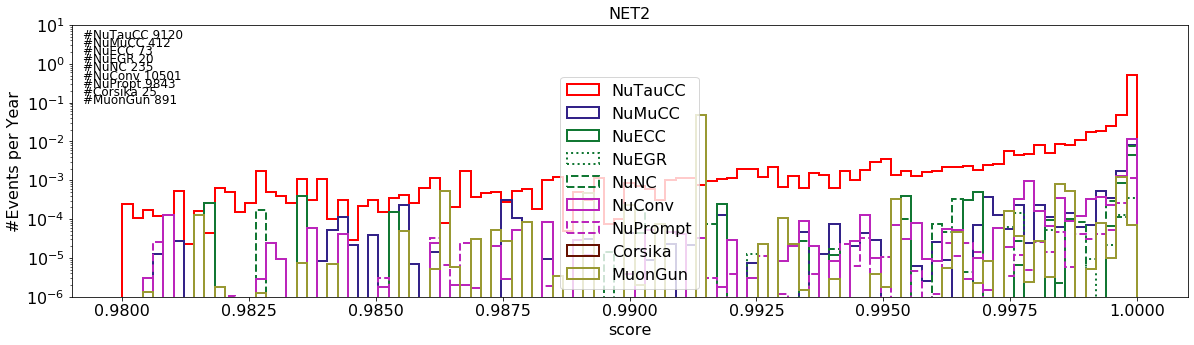

In [70]:
NET2 = 0.98

PlotHist("NET2", "score", data_tc['preds']['n2'],data_mc['preds']['n2'],data_ec['preds']['n2'],data_eg['preds']['n2'],\
         data_n['preds']['n2'],data_ac['preds']['n2'],data_ap['preds']['n2'],data_c['preds']['n2_1'],data_g['preds']['n2_1'],\
         data_tc[weight_name][wtype],data_mc[weight_name][wtype],data_ec[weight_name][wtype],\
         data_eg[weight_name][wtype],data_n[weight_name][wtype],data_ac[weight_name_c],data_ap[weight_name_c],\
         data_c[weight_name_c],data_g[weight_name_c],secs_per_year,ylims=[10**(-5),10**(5)],\
         b =np.linspace(0,1,100),xscale ='linear')

PlotHist("NET2", "score", data_tc['preds']['n2'][mask0_tc],data_mc['preds']['n2'][mask0_mc],\
         data_ec['preds']['n2'][mask0_ec],data_eg['preds']['n2'][mask0_eg],data_n['preds']['n2'][mask0_n],\
         data_ac['preds']['n2'][mask0_ac],data_ap['preds']['n2'][mask0_ap],data_c['preds']['n2_1'][mask0_c],\
         data_g['preds']['n2_1'][mask0_g],data_tc[weight_name][wtype][mask0_tc],data_mc[weight_name][wtype][mask0_mc],\
         data_ec[weight_name][wtype][mask0_ec],data_eg[weight_name][wtype][mask0_eg],data_n[weight_name][wtype][mask0_n],\
         data_ac[weight_name_c][mask0_ac],data_ap[weight_name_c][mask0_ap],data_c[weight_name_c][mask0_c],\
         data_g[weight_name_c][mask0_g],secs_per_year,ylims=[10**(-6),10**(1)],\
         b =np.linspace(NET2,1,100),xscale ='linear')

maskn2_tc = data_tc['preds']['n2'] > NET2
maskn2_mc = data_mc['preds']['n2'] > NET2
maskn2_ec = data_ec['preds']['n2'] > NET2
maskn2_eg = data_eg['preds']['n2'] > NET2
maskn2_n = data_n['preds']['n2'] > NET2
maskn2_ac = data_ac['preds']['n2'] > NET2
maskn2_ap = data_ap['preds']['n2'] > NET2
maskn2_c = data_c['preds']['n2_1'] > NET2
maskn2_g = data_g['preds']['n2_1'] > NET2
maskn2_b = data_b['preds']['n2_1'] > NET2

GetRates("Rates after NET2 cut",secs_per_year,data_tc[maskn2_tc],data_mc[maskn2_mc],\
         data_ec[maskn2_ec],data_eg[maskn2_eg],data_n[maskn2_n],data_ac[maskn2_ac],\
         data_ap[maskn2_ap],data_c[maskn2_c],data_g[maskn2_g],data_b[maskn2_b])

GetRates("Rates after Rates after NET1 and NET3 and NET2 cut",secs_per_year,data_tc[maskn2_tc & mask0_tc],data_mc[maskn2_mc & mask0_mc],\
         data_ec[maskn2_ec & mask0_ec],data_eg[maskn2_eg & mask0_eg],data_n[maskn2_n & mask0_n],data_ac[maskn2_ac & mask0_ac],\
         data_ap[maskn2_ap & mask0_ap],data_c[maskn2_c & mask0_c],data_g[maskn2_g & mask0_g],data_b[maskn2_b & mask0_b])

In [41]:
def Scatter2dCuts(data_tc1,data_tc2,data_mc1,data_mc2,data_ec1,data_ec2,data_eg1,data_eg2,data_n1,data_n2,\
                  data_ac1,data_ac2,data_ap1,data_ap2,data_c1,data_c2,data_g1,data_g2,data_b1,data_b2,
                  l1=[0,1],l2=[0,1], label1 ="label",label2="label"):
  
   
    #plt.subplot(1,4,4)
    x = np.linspace(contain,500,10)
    y = x*m+b
    
    fig, ax = plt.subplots(nrows=2, ncols=5,sharex = True,sharey=True, figsize=(20,8),facecolor ='w')
    plt.title('Network scores', fontdict={'fontsize': 14, 'fontweight': 'medium'})

    plt.subplot(2,5,1)
    ax1 = plt.gca()
    ax1.set_xlim(l1)
    ax1.set_ylim(l2)
    ax1.set_title('NuECC')
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax1.plot(x,y,'k')
    plt.scatter(data_ec1,data_ec2, c = colors[3], s =0.5)
    #plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(2,5,6)
    ax1 = plt.gca()
    ax1.set_xlim(l1)
    ax1.set_ylim(l2)
    ax1.set_title('NuEGR')
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax1.plot(x,y,'k')
    plt.scatter(data_eg1,data_eg2, c = colors[3], s =0.5)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.tick_params(axis='both', which='minor', labelsize=8)


    plt.subplot(2,5,2)
    ax3 = plt.gca()
    ax3.set_xlim(l1)
    ax3.set_ylim(l2)
    ax3.set_title('NuTauCC')
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax3.plot(x,y,'k')
    plt.scatter(data_tc1,data_tc2, c = colors[0], s =0.5)
    #plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax3.tick_params(axis='both', left = True,  labelleft = True, which='major', labelsize=8)
    ax3.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(2,5,7)
    ax3 = plt.gca()
    ax3.set_xlim(l1)
    ax3.set_ylim(l2)
    ax3.set_title('NuNC')
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax3.plot(x,y,'k')
    plt.scatter(data_n1,data_n2, c = colors[0], s =0.5)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax3.tick_params(axis='both', left = True,  labelleft = True, which='major', labelsize=8)
    ax3.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(2,5,3)
    ax3 = plt.gca()
    ax3.set_xlim(l1)
    ax3.set_ylim(l2)
    ax3.set_title('NuAtmos')
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax3.plot(x,y,'k')
    plt.scatter(data_ac1,data_ac2, c = colors[1], s =0.5)
    #plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax3.tick_params(axis='both', left = True,  labelleft = True, which='major', labelsize=8)
    ax3.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(2,5,8)
    ax3 = plt.gca()
    ax3.set_xlim(l1)
    ax3.set_ylim(l2)
    ax3.set_title('NuPrompt')
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax3.plot(x,y,'k')
    plt.scatter(data_ap1,data_ap2, c = colors[1], s =0.5)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax3.tick_params(axis='both', left = True,  labelleft = True, which='major', labelsize=8)
    ax3.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(2,5,4)
    ax4 = plt.gca()
    ax4.set_xlim(l1)
    ax4.set_ylim(l2)
    ax4.set_title('Corsika')
    plt.scatter(data_c1,data_c2, c = colors[5], s =0.5)
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax4.plot(x,y,'k')
    #plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax4.tick_params(axis='both', left = True,  labelleft = True, which='major', labelsize=8)
    ax4.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(2,5,9)
    ax5 = plt.gca()
    ax5.set_xlim(l1)
    ax5.set_ylim(l2)
    ax5.set_title('MuonGun')
    plt.scatter(data_g1,data_g2, c = colors[4], s =0.5)
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax5.plot(x,y,'k')
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax5.tick_params(axis='both', left = True,  labelleft = True,  which='major', labelsize=8)
    ax5.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(2,5,5)
    ax5 = plt.gca()
    ax5.set_xlim(l1)
    ax5.set_ylim(l2)
    ax5.set_title('BurnSample')
    plt.scatter(data_b1,data_b2, c = 'k', s =0.5)
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax5.plot(x,y,'k')
    #plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax5.tick_params(axis='both', left = True,  labelleft = True,  which='major', labelsize=8)
    ax5.tick_params(axis='both', which='minor', labelsize=8)
    
    plt.subplot(2,5,10)
    ax5 = plt.gca()
    ax5.set_xlim(l1)
    ax5.set_ylim(l2)
    ax5.set_title('NuMuCC')
    plt.scatter(data_mc1,data_mc2, c = colors[3], s =0.5)
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax5.plot(x,y,'k')
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax5.tick_params(axis='both', left = True,  labelleft = True,  which='major', labelsize=8)
    ax5.tick_params(axis='both', which='minor', labelsize=8)
    
    plt.show()    

In [95]:
weight_name = 'weight_val'
#masks0_tc = (data_tc['preds']['n1'] != 0) 
#masks0_mc = (data_mc['preds']['n1'] != 0) 
#masks0_ec = (data_ec['preds']['n1'] != 0) 
#masks0_eg = (data_eg['preds']['n1'] != 0)
#masks0_n = (data_n['preds']['n1'] != 0) 
maskw_ac = (data_ac[weight_name] != 0)
maskw_ap = (data_ap[weight_name] != 0) 
#masks0_c =  (data_c['preds']['n1'] != 0) 
#masks0_g =  (data_g['preds']['n1'] != 0)
#masks0_b =  (data_b['preds']['n1'] != 0)


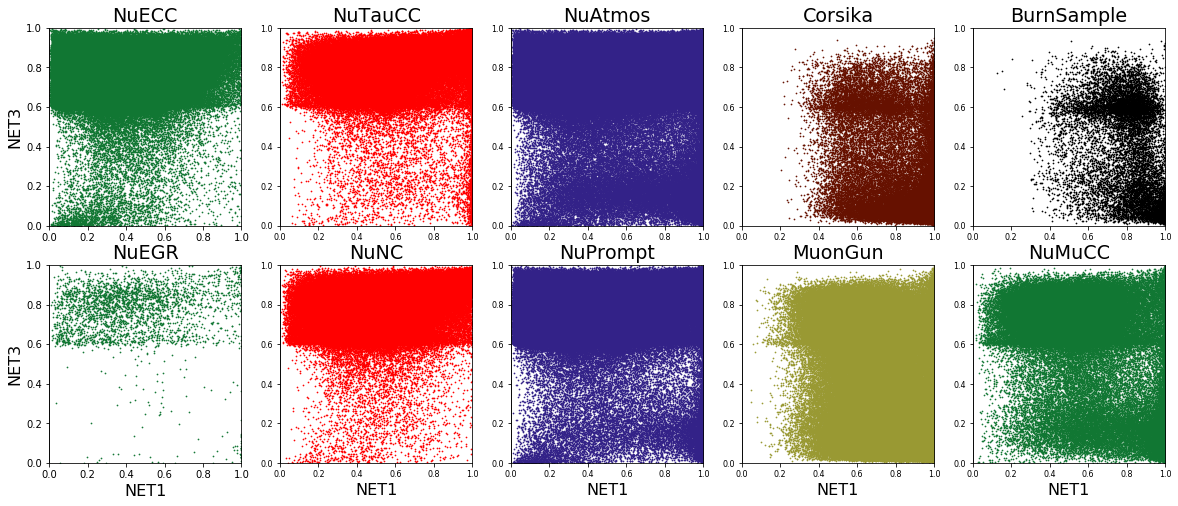

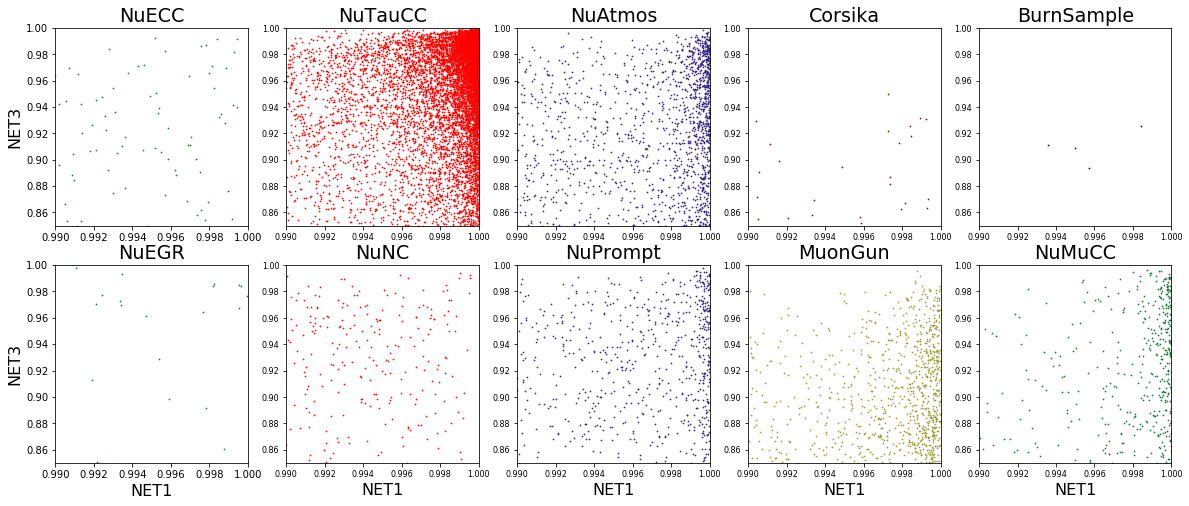

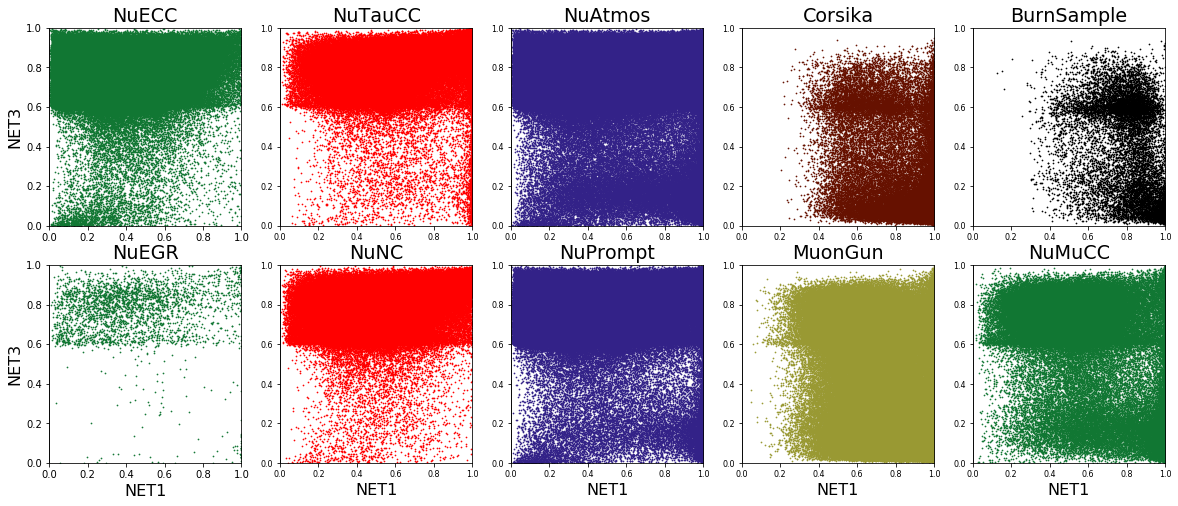

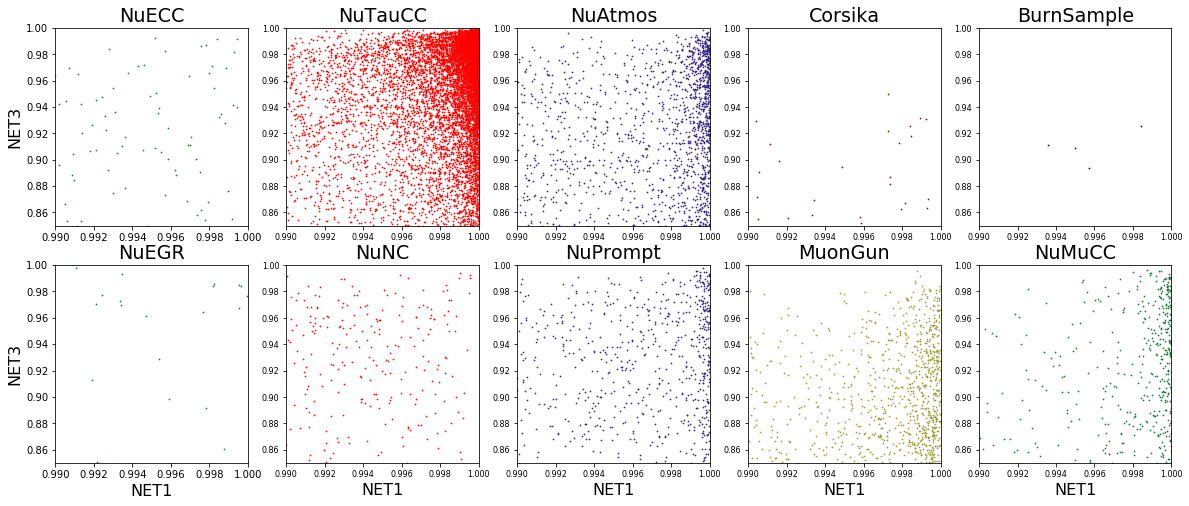

In [98]:
Scatter2dCuts(data_tc['preds']['n1'],data_tc['preds']['n3'],data_mc['preds']['n1'],data_mc['preds']['n3'],\
              data_ec['preds']['n1'],data_ec['preds']['n3'],data_eg['preds']['n1'],data_eg['preds']['n3'],\
              data_n['preds']['n1'],data_n['preds']['n3'],\
              data_ac['preds']['n1'][maskw_ac],data_ac['preds']['n3'][maskw_ac],\
              data_ap['preds']['n1'][maskw_ap],data_ap['preds']['n3'][maskw_ap],\
              data_c['preds']['n1'],data_c['preds']['n3'],\
              data_g['preds']['n1'],data_g['preds']['n3'],data_b['preds']['n1'],data_b['preds']['n3'],\
              l1=[0,1],l2=[0,1], label2 ="NET3",label1="NET1")

Scatter2dCuts(data_tc['preds']['n1'],data_tc['preds']['n3'],data_mc['preds']['n1'],data_mc['preds']['n3'],\
              data_ec['preds']['n1'],data_ec['preds']['n3'],data_eg['preds']['n1'],data_eg['preds']['n3'],\
              data_n['preds']['n1'],data_n['preds']['n3'],\
              data_ac['preds']['n1'][maskw_ac],data_ac['preds']['n3'][maskw_ac],\
              data_ap['preds']['n1'][maskw_ap],data_ap['preds']['n3'][maskw_ap],\
              data_c['preds']['n1'],data_c['preds']['n3'],\
              data_g['preds']['n1'],data_g['preds']['n3'],data_b['preds']['n1'],data_b['preds']['n3'],\
              l1=[0.99,1],l2=[0.85,1], label2 ="NET3",label1="NET1")

Scatter2dCuts(data_tc['preds']['n1'][maskq_tc],data_tc['preds']['n3'][maskq_tc],\
              data_mc['preds']['n1'][maskq_mc],data_mc['preds']['n3'][maskq_mc],\
              data_ec['preds']['n1'][maskq_ec],data_ec['preds']['n3'][maskq_ec],\
              data_eg['preds']['n1'][maskq_eg],data_eg['preds']['n3'][maskq_eg],\
              data_n['preds']['n1'][maskq_n],data_n['preds']['n3'][maskq_n],\
              data_ac['preds']['n1'][maskq_ac & maskw_ac],data_ac['preds']['n3'][maskq_ac& maskw_ac],\
              data_ap['preds']['n1'][maskq_ap & maskw_ap],data_ap['preds']['n3'][maskq_ap & maskw_ap],\
              data_c['preds']['n1'][maskq_c],data_c['preds']['n3'][maskq_c],\
              data_g['preds']['n1'][maskq_g],data_g['preds']['n3'][maskq_g],\
              data_b['preds']['n1'][maskq_b],data_b['preds']['n3'][maskq_b],\
              l1=[0,1],l2=[0,1], label2 ="NET3",label1="NET1")

Scatter2dCuts(data_tc['preds']['n1'][maskq_tc],data_tc['preds']['n3'][maskq_tc],\
              data_mc['preds']['n1'][maskq_mc],data_mc['preds']['n3'][maskq_mc],\
              data_ec['preds']['n1'][maskq_ec],data_ec['preds']['n3'][maskq_ec],\
              data_eg['preds']['n1'][maskq_eg],data_eg['preds']['n3'][maskq_eg],\
              data_n['preds']['n1'][maskq_n],data_n['preds']['n3'][maskq_n],\
              data_ac['preds']['n1'][maskq_ac & maskw_ac],data_ac['preds']['n3'][maskq_ac & maskw_ac],\
              data_ap['preds']['n1'][maskq_ap & maskw_ap],data_ap['preds']['n3'][maskq_ap & maskw_ap],\
              data_c['preds']['n1'][maskq_c],data_c['preds']['n3'][maskq_c],\
              data_g['preds']['n1'][maskq_g],data_g['preds']['n3'][maskq_g],\
              data_b['preds']['n1'][maskq_b],data_b['preds']['n3'][maskq_b],\
              l1=[0.99,1],l2=[0.85,1], label2 ="NET3",label1="NET1")

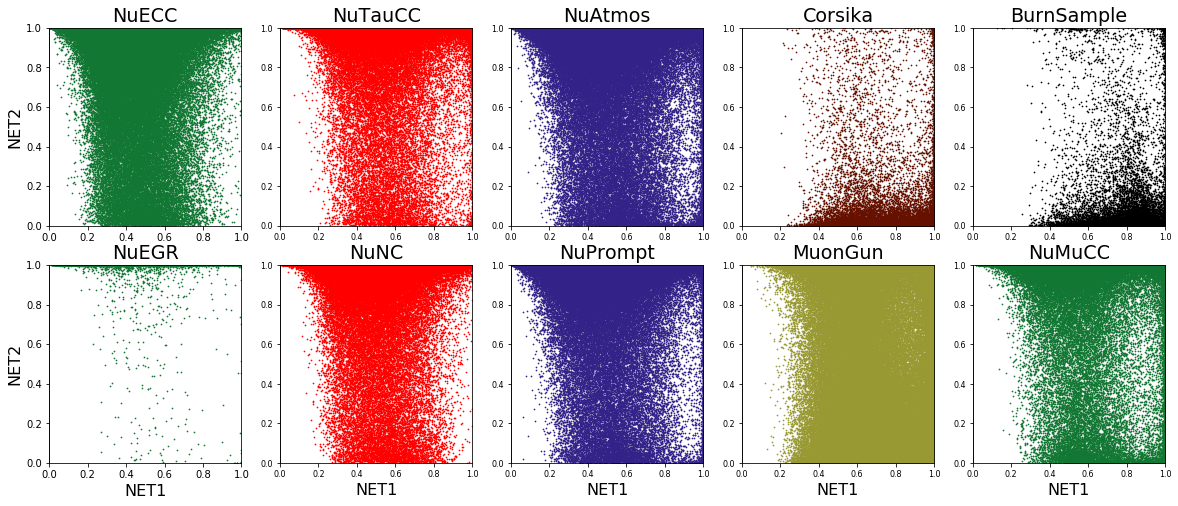

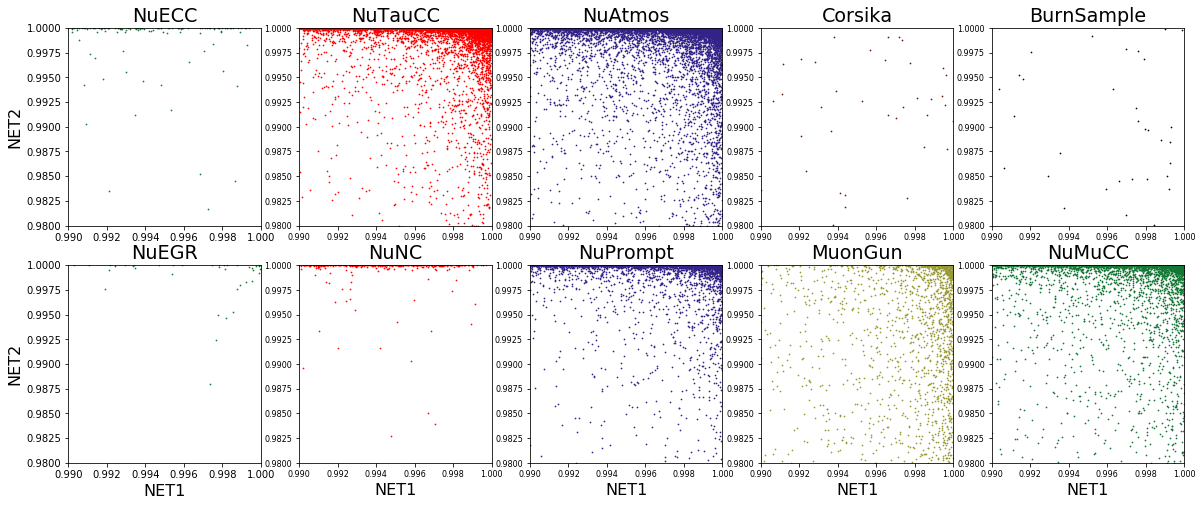

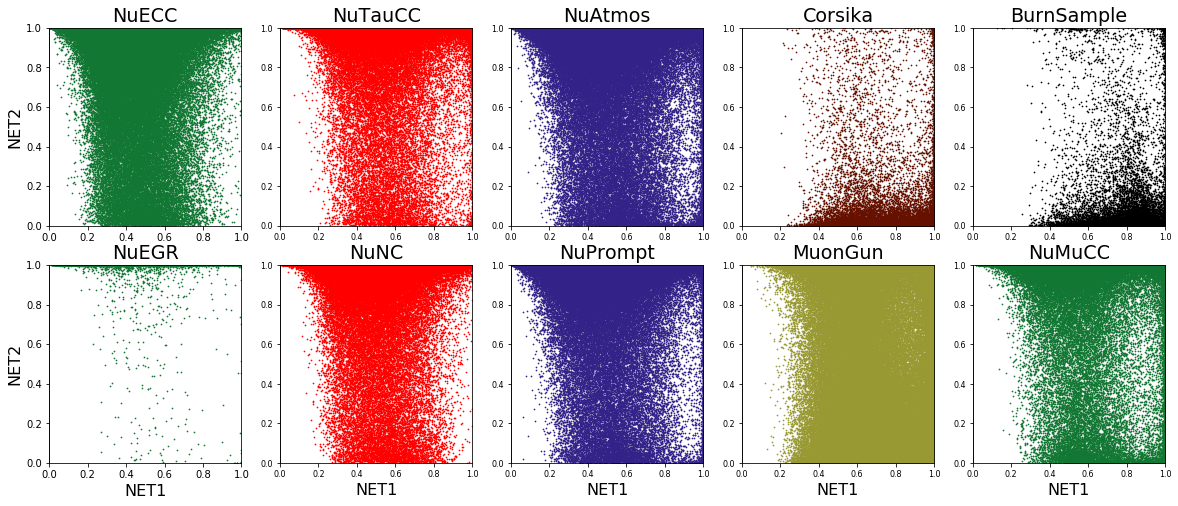

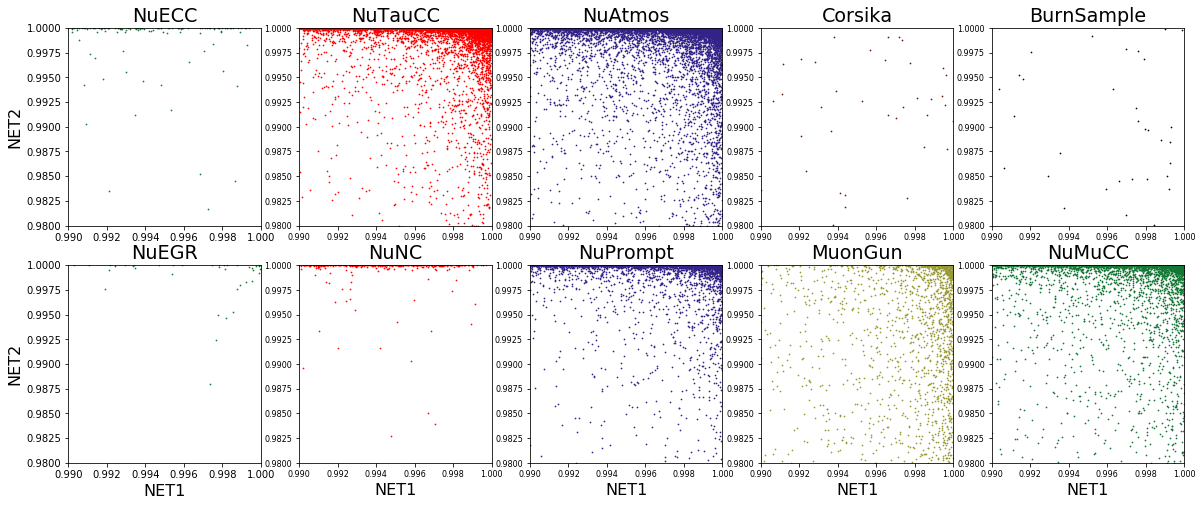

In [101]:
Scatter2dCuts(data_tc['preds']['n1'],data_tc['preds']['n2'],data_mc['preds']['n1'],data_mc['preds']['n2'],\
              data_ec['preds']['n1'],data_ec['preds']['n2'],data_eg['preds']['n1'],data_eg['preds']['n2'],\
              data_n['preds']['n1'],data_n['preds']['n2'],\
              data_ac['preds']['n1'][maskw_ac],data_ac['preds']['n2'][maskw_ac],\
              data_ap['preds']['n1'][maskw_ap],data_ap['preds']['n2'][maskw_ap],
              data_c['preds']['n1'],data_c['preds']['n2_1'],\
              data_g['preds']['n1'],data_g['preds']['n2_1'],data_b['preds']['n1'],data_b['preds']['n2_1'],\
              l1=[0,1],l2=[0,1], label2 ="NET2",label1="NET1")

Scatter2dCuts(data_tc['preds']['n1'],data_tc['preds']['n2'],data_mc['preds']['n1'],data_mc['preds']['n2'],\
              data_ec['preds']['n1'],data_ec['preds']['n2'],data_eg['preds']['n1'],data_eg['preds']['n2'],\
              data_n['preds']['n1'],data_n['preds']['n2'],\
              data_ac['preds']['n1'][maskw_ac],data_ac['preds']['n2'][maskw_ac],\
              data_ap['preds']['n1'][maskw_ap],data_ap['preds']['n2'][maskw_ap],\
              data_c['preds']['n1'],data_c['preds']['n2_1'],\
              data_g['preds']['n1'],data_g['preds']['n2_1'],data_b['preds']['n1'],data_b['preds']['n2_1'],\
              l1=[0.99,1],l2=[0.98,1], label2 ="NET2",label1="NET1")

Scatter2dCuts(data_tc['preds']['n1'][maskq_tc],data_tc['preds']['n2'][maskq_tc],\
              data_mc['preds']['n1'][maskq_mc],data_mc['preds']['n2'][maskq_mc],\
              data_ec['preds']['n1'][maskq_ec],data_ec['preds']['n2'][maskq_ec],\
              data_eg['preds']['n1'][maskq_eg],data_eg['preds']['n2'][maskq_eg],\
              data_n['preds']['n1'][maskq_n],data_n['preds']['n2'][maskq_n],\
              data_ac['preds']['n1'][maskq_ac & maskw_ac],data_ac['preds']['n2'][maskq_ac & maskw_ac],\
              data_ap['preds']['n1'][maskq_ap & maskw_ap],data_ap['preds']['n2'][maskq_ap & maskw_ap],\
              data_c['preds']['n1'][maskq_c],data_c['preds']['n2_1'][maskq_c],\
              data_g['preds']['n1'][maskq_g],data_g['preds']['n2_1'][maskq_g],\
              data_b['preds']['n1'][maskq_b],data_b['preds']['n2_1'][maskq_b],\
              l1=[0,1],l2=[0,1], label2 ="NET2",label1="NET1")

Scatter2dCuts(data_tc['preds']['n1'][maskq_tc],data_tc['preds']['n2'][maskq_tc],\
              data_mc['preds']['n1'][maskq_mc],data_mc['preds']['n2'][maskq_mc],\
              data_ec['preds']['n1'][maskq_ec],data_ec['preds']['n2'][maskq_ec],\
              data_eg['preds']['n1'][maskq_eg],data_eg['preds']['n2'][maskq_eg],\
              data_n['preds']['n1'][maskq_n],data_n['preds']['n2'][maskq_n],\
              data_ac['preds']['n1'][maskq_ac & maskw_ac],data_ac['preds']['n2'][maskq_ac & maskw_ac],\
              data_ap['preds']['n1'][maskq_ap & maskw_ap],data_ap['preds']['n2'][maskq_ap & maskw_ap],\
              data_c['preds']['n1'][maskq_c],data_c['preds']['n2_1'][maskq_c],\
              data_g['preds']['n1'][maskq_g],data_g['preds']['n2_1'][maskq_g],\
              data_b['preds']['n1'][maskq_b],data_b['preds']['n2_1'][maskq_b],\
              l1=[0.99,1],l2=[0.98,1], label2 ="NET2",label1="NET1")

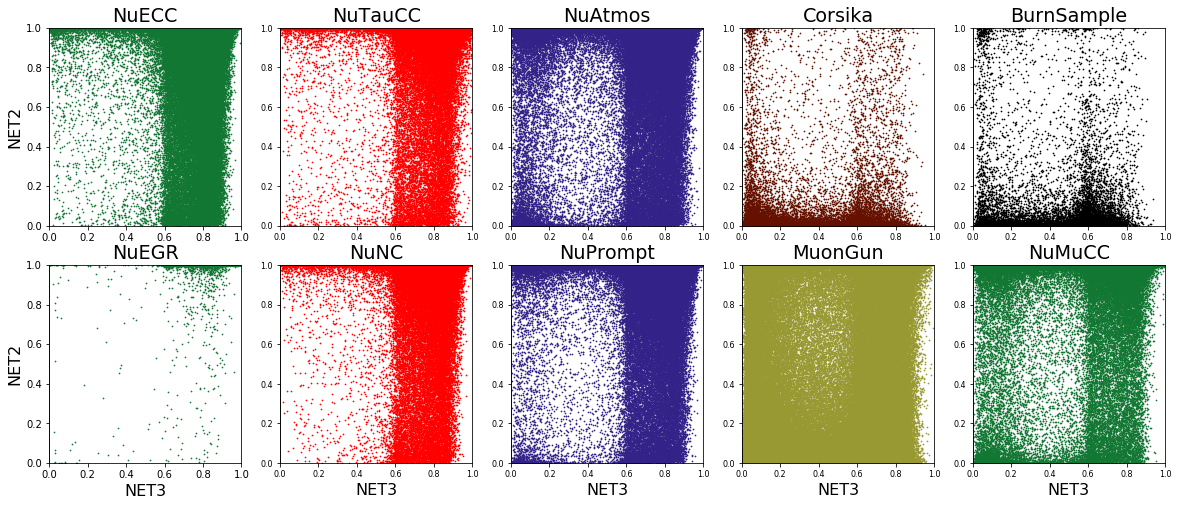

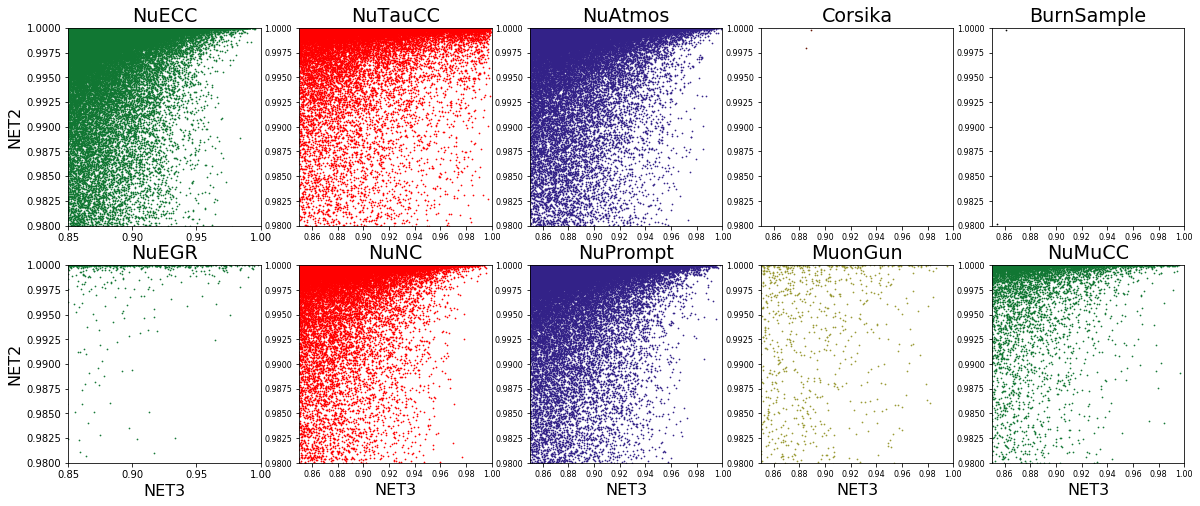

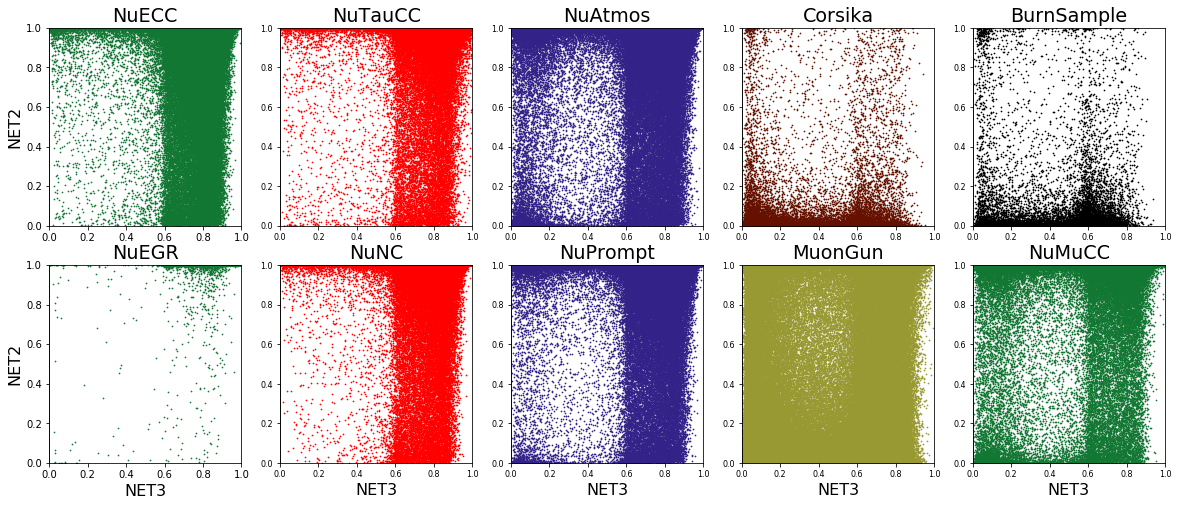

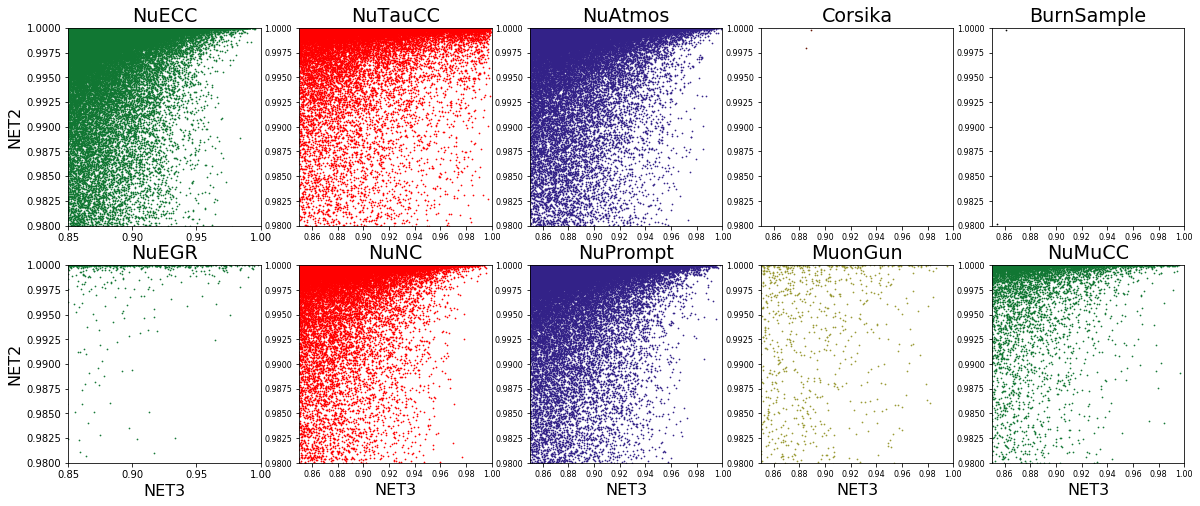

In [103]:
Scatter2dCuts(data_tc['preds']['n3'],data_tc['preds']['n2'],data_mc['preds']['n3'],data_mc['preds']['n2'],\
              data_ec['preds']['n3'],data_ec['preds']['n2'],data_eg['preds']['n3'],data_eg['preds']['n2'],\
              data_n['preds']['n3'],data_n['preds']['n2'],\
              data_ac['preds']['n3'][maskw_ac],data_ac['preds']['n2'][maskw_ac],\
              data_ap['preds']['n3'][maskw_ap],data_ap['preds']['n2'][maskw_ap],\
              data_c['preds']['n3'],data_c['preds']['n2_1'],\
              data_g['preds']['n3'],data_g['preds']['n2_1'],data_b['preds']['n3'],data_b['preds']['n2_1'],\
              l1=[0,1],l2=[0,1], label2 ="NET2",label1="NET3")

Scatter2dCuts(data_tc['preds']['n3'],data_tc['preds']['n2'],data_mc['preds']['n3'],data_mc['preds']['n2'],\
              data_ec['preds']['n3'],data_ec['preds']['n2'],data_eg['preds']['n3'],data_eg['preds']['n2'],\
              data_n['preds']['n3'],data_n['preds']['n2'],\
              data_ac['preds']['n3'][maskw_ac],data_ac['preds']['n2'][maskw_ac],\
              data_ap['preds']['n3'][maskw_ap],data_ap['preds']['n2'][maskw_ap],\
              data_c['preds']['n3'],data_c['preds']['n2_1'],\
              data_g['preds']['n3'],data_g['preds']['n2_1'],data_b['preds']['n3'],data_b['preds']['n2_1'],\
              l1=[0.85,1],l2=[0.98,1], label2 ="NET2",label1="NET3")

Scatter2dCuts(data_tc['preds']['n3'][maskq_tc],data_tc['preds']['n2'][maskq_tc],\
              data_mc['preds']['n3'][maskq_mc],data_mc['preds']['n2'][maskq_mc],\
              data_ec['preds']['n3'][maskq_ec],data_ec['preds']['n2'][maskq_ec],\
              data_eg['preds']['n3'][maskq_eg],data_eg['preds']['n2'][maskq_eg],\
              data_n['preds']['n3'][maskq_n],data_n['preds']['n2'][maskq_n],\
              data_ac['preds']['n3'][maskq_ac & maskw_ac],data_ac['preds']['n2'][maskq_ac & maskw_ac],\
              data_ap['preds']['n3'][maskq_ap & maskw_ap],data_ap['preds']['n2'][maskq_ap & maskw_ap],\
              data_c['preds']['n3'][maskq_c],data_c['preds']['n2_1'][maskq_c],\
              data_g['preds']['n3'][maskq_g],data_g['preds']['n2_1'][maskq_g],\
              data_b['preds']['n3'][maskq_b],data_b['preds']['n2_1'][maskq_b],\
              l1=[0,1],l2=[0,1], label2 ="NET2",label1="NET3")

Scatter2dCuts(data_tc['preds']['n3'][maskq_tc],data_tc['preds']['n2'][maskq_tc],\
              data_mc['preds']['n3'][maskq_mc],data_mc['preds']['n2'][maskq_mc],\
              data_ec['preds']['n3'][maskq_ec],data_ec['preds']['n2'][maskq_ec],\
              data_eg['preds']['n3'][maskq_eg],data_eg['preds']['n2'][maskq_eg],\
              data_n['preds']['n3'][maskq_n],data_n['preds']['n2'][maskq_n],\
              data_ac['preds']['n3'][maskq_ac & maskw_ac],data_ac['preds']['n2'][maskq_ac & maskw_ac],\
              data_ap['preds']['n3'][maskq_ap & maskw_ap],data_ap['preds']['n2'][maskq_ap & maskw_ap],\
              data_c['preds']['n3'][maskq_c],data_c['preds']['n2_1'][maskq_c],\
              data_g['preds']['n3'][maskq_g],data_g['preds']['n2_1'][maskq_g],\
              data_b['preds']['n3'][maskq_b],data_b['preds']['n2_1'][maskq_b],\
              l1=[0.85,1],l2=[0.98,1], label2 ="NET2",label1="NET3")

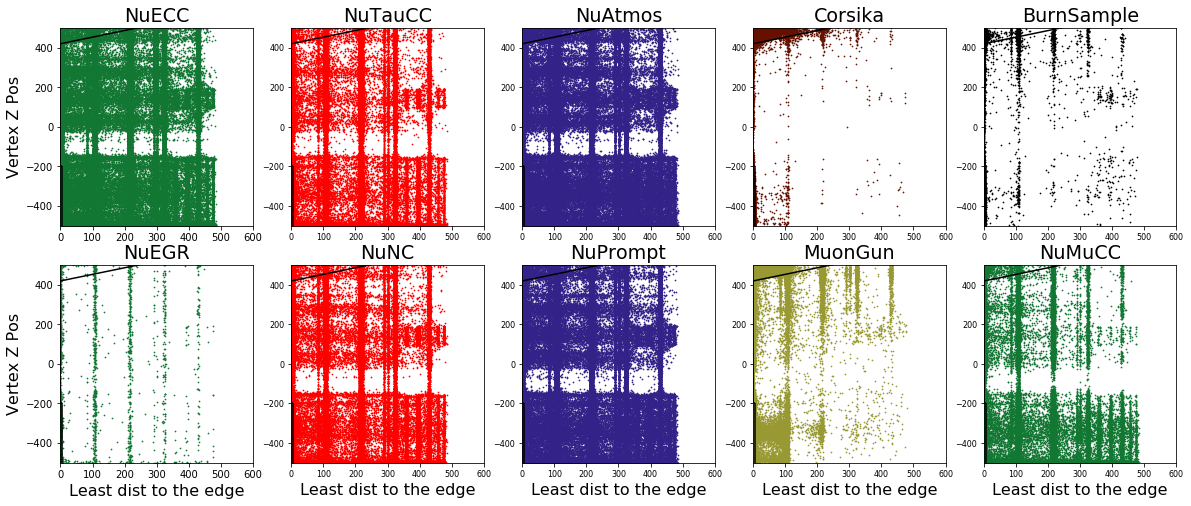

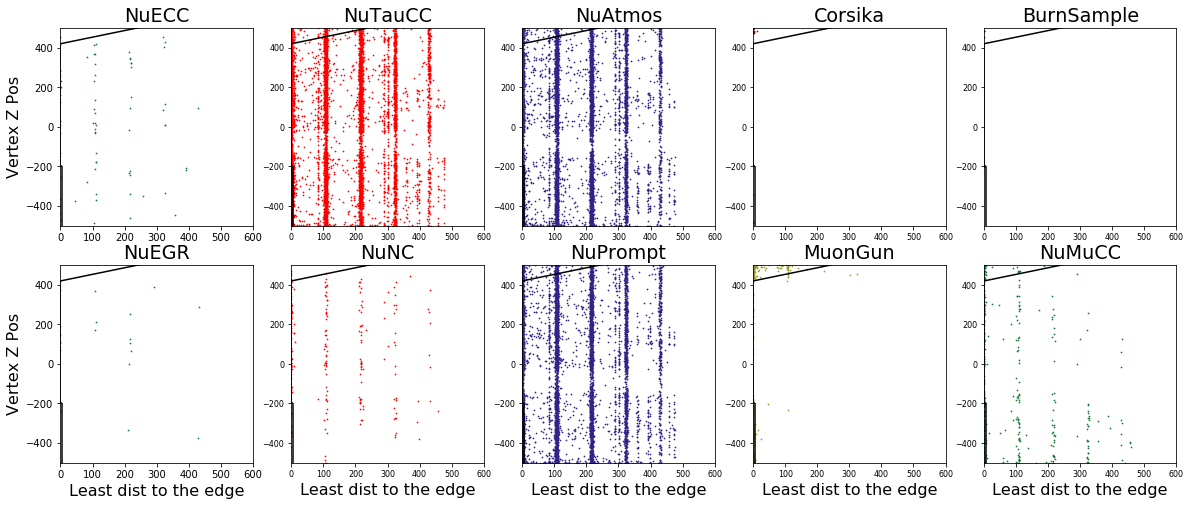

Rates after Geometry cut
NuTauCC = 45.487 +/- 0.285
NuMuCC = 12.009 +/- 0.096
NuECC =  71.049 +/- 0.248
NuEGR =  0.323 +/- 0.019
NuNC =   26.631 +/- 0.171
NuConv =   89.860 +/- 1.215
NuPrompt =   3.391 +/- 0.013
Corsika =   8358.312 +/- 477.548
MuonGun =   1880.016 +/- 18.609
Rates after NET1 and NET3 and Geometry cut
NuTauCC = 0.488 +/- 0.013
NuMuCC = 0.008 +/- 0.001
NuECC =  0.007 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.007 +/- 0.001
NuConv =   0.011 +/- 0.002
NuPrompt =   0.001 +/- 0.000
Corsika =   0.000 +/- 0.000
MuonGun =   0.076 +/- 0.074


In [46]:
Scatter2dCuts(data_tc['logan_veto']['LeastDistanceToPolygon_Veto'],data_tc['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_mc['logan_veto']['LeastDistanceToPolygon_Veto'],data_mc['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_ec['logan_veto']['LeastDistanceToPolygon_Veto'],data_ec['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_eg['logan_veto']['LeastDistanceToPolygon_Veto'],data_eg['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_n['logan_veto']['LeastDistanceToPolygon_Veto'],data_n['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_ac['logan_veto']['LeastDistanceToPolygon_Veto'],data_ac['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_ap['logan_veto']['LeastDistanceToPolygon_Veto'],data_ap['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_c['logan_veto']['LeastDistanceToPolygon_Veto'],data_c['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_g['logan_veto']['LeastDistanceToPolygon_Veto'],data_g['logan_veto']['VHESelfVetoVertexPosZ'],\
              data_b['logan_veto']['LeastDistanceToPolygon_Veto'],data_b['logan_veto']['VHESelfVetoVertexPosZ'],\
              l1=[0,600],l2=[-500,500], label2 ="Vertex Z Pos",label1="Least dist to the edge")
Scatter2dCuts(data_tc['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_tc],data_tc['logan_veto']['VHESelfVetoVertexPosZ'][masks0_tc],\
              data_mc['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_mc],data_mc['logan_veto']['VHESelfVetoVertexPosZ'][masks0_mc],\
              data_ec['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_ec],data_ec['logan_veto']['VHESelfVetoVertexPosZ'][masks0_ec],\
              data_eg['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_eg],data_eg['logan_veto']['VHESelfVetoVertexPosZ'][masks0_eg],\
              data_n['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_n],data_n['logan_veto']['VHESelfVetoVertexPosZ'][masks0_n],\
              data_ac['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_ac],data_ac['logan_veto']['VHESelfVetoVertexPosZ'][masks0_ac],\
              data_ap['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_ap],data_ap['logan_veto']['VHESelfVetoVertexPosZ'][masks0_ap],\
              data_c['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_c],data_c['logan_veto']['VHESelfVetoVertexPosZ'][masks0_c],\
              data_g['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_g],data_g['logan_veto']['VHESelfVetoVertexPosZ'][masks0_g],\
              data_b['logan_veto']['LeastDistanceToPolygon_Veto'][masks0_b],data_b['logan_veto']['VHESelfVetoVertexPosZ'][masks0_b],\
              l1=[0,600],l2=[-500,500], label2 ="Vertex Z Pos",label1="Least dist to the edge")


maskg_tc = (data_tc['logan_veto']["LeastDistanceToPolygon_Veto"]> contain) &\
((data_tc['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_tc['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_tc['logan_veto']["LeastDistanceToPolygon_Veto"] + data_tc['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_mc = (data_mc['logan_veto']["LeastDistanceToPolygon_Veto"]> contain) &\
((data_mc['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_mc['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_mc['logan_veto']["LeastDistanceToPolygon_Veto"] + data_mc['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_ec = (data_ec['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_ec['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_ec['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_ec['logan_veto']["LeastDistanceToPolygon_Veto"] +data_ec['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_eg = (data_eg['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_eg['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_eg['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_eg['logan_veto']["LeastDistanceToPolygon_Veto"] +data_eg['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_n = (data_n['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_n['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_n['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_n['logan_veto']["LeastDistanceToPolygon_Veto"] +data_n['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_ac = (data_ac['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_ac['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_ac['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_ac['logan_veto']["LeastDistanceToPolygon_Veto"] +data_ac['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_ap = (data_ap['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_ap['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_ap['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_ap['logan_veto']["LeastDistanceToPolygon_Veto"] +data_ap['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_c = (data_c['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_c['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_c['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_c['logan_veto']["LeastDistanceToPolygon_Veto"] +data_c['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_g = (data_g['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_g['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_g['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_g['logan_veto']["LeastDistanceToPolygon_Veto"] +data_g['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_b = (data_b['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_b['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_b['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_b['logan_veto']["LeastDistanceToPolygon_Veto"] +data_b['logan_veto']['VHESelfVetoVertexPosZ']) < b)


GetRates("Rates after Geometry cut",secs_per_year,data_tc[maskg_tc],data_mc[maskg_mc],\
         data_ec[maskg_ec],data_eg[maskg_eg],data_n[maskg_n],data_ac[maskg_ac],\
         data_ap[maskg_ap],data_c[maskg_c],data_g[maskg_g],data_b[maskg_b])

GetRates("Rates after NET1 and NET3 and Geometry cut",secs_per_year,data_tc[maskg_tc & mask0_tc],data_mc[maskg_mc  & mask0_mc],\
         data_ec[maskg_ec & mask0_ec],data_eg[maskg_eg & mask0_eg],data_n[maskg_n & mask0_n],data_ac[maskg_ac & mask0_ac],\
         data_ap[maskg_ap & mask0_ap],data_c[maskg_c & mask0_c],data_g[maskg_g & mask0_g],data_b[maskg_b & mask0_b])

In [47]:
maska_tc = maskq0_tc & maskq1_tc & maskq2_tc & maskqt_tc & maskz_tc & maskg_tc & maskl_tc
maska_mc = maskq0_mc & maskq1_mc & maskq2_mc & maskqt_mc & maskz_mc & maskg_mc & maskl_mc
maska_ec = maskq0_ec & maskq1_ec & maskq2_ec & maskqt_ec & maskz_ec & maskg_ec & maskl_ec
maska_eg = maskq0_eg & maskq1_eg & maskq2_eg & maskqt_eg & maskz_eg & maskg_eg & maskl_eg
maska_n = maskq0_n & maskq1_n & maskq2_n & maskqt_n & maskz_n & maskg_n & maskl_n
maska_ac = maskq0_ac & maskq1_ac & maskq2_ac & maskqt_ac & maskz_ac & maskg_ac & maskl_ac
maska_ap = maskq0_ap & maskq1_ap & maskq2_ap & maskqt_ap & maskz_ap & maskg_ap & maskl_ap
maska_c = maskq0_c & maskq1_c & maskq2_c & maskqt_c & maskz_c & maskg_c & maskl_c
maska_g = maskq0_g & maskq1_g & maskq2_g & maskqt_g & maskz_g & maskg_g & maskl_g
maska_b = maskq0_b & maskq1_b & maskq2_b & maskqt_b & maskz_b & maskg_b & maskl_b

GetRates("Rates after All cuts",secs_per_year,data_tc[maskg_tc],data_mc[maskg_mc],\
         data_ec[maskg_ec],data_eg[maskg_eg],data_n[maskg_n],data_ac[maskg_ac],\
         data_ap[maskg_ap],data_c[maskg_c],data_g[maskg_g],data_b[maskg_b])

GetRates("Rates after NET1 and NET3 and All cuts",secs_per_year,data_tc[maska_tc & mask0_tc],data_mc[maska_mc & mask0_mc],\
         data_ec[maska_ec & mask0_ec],data_eg[maska_eg & mask0_eg],data_n[maska_n & mask0_n],data_ac[maska_ac & mask0_ac],\
         data_ap[maska_ap & mask0_ap],data_c[maska_c & mask0_c],data_g[maska_g & mask0_g],data_b[maska_b & mask0_b])

Rates after All cuts
NuTauCC = 45.487 +/- 0.285
NuMuCC = 12.009 +/- 0.096
NuECC =  71.049 +/- 0.248
NuEGR =  0.323 +/- 0.019
NuNC =   26.631 +/- 0.171
NuConv =   89.860 +/- 1.215
NuPrompt =   3.391 +/- 0.013
Corsika =   8358.312 +/- 477.548
MuonGun =   1880.016 +/- 18.609
Rates after NET1 and NET3 and All cuts
NuTauCC = 0.485 +/- 0.013
NuMuCC = 0.008 +/- 0.001
NuECC =  0.007 +/- 0.001
NuEGR =  0.001 +/- 0.000
NuNC =   0.007 +/- 0.001
NuConv =   0.011 +/- 0.002
NuPrompt =   0.001 +/- 0.000
Corsika =   0.000 +/- 0.000
MuonGun =   0.076 +/- 0.074


In [28]:
def Plot3D(data_n1, data_n2, data_n3, color):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(projection='3d')
    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    ax.scatter(data_n1, data_n2, data_n3,s =0.5,c= color)
    ax.set_xlabel('NuE (NET1)')
    ax.set_ylabel('Coriska (NET2)')
    ax.set_zlabel('NuMu (NET3)')
    ax.zaxis.set_rotate_label(True) 
    ax.view_init(45, 45)
    plt.show()

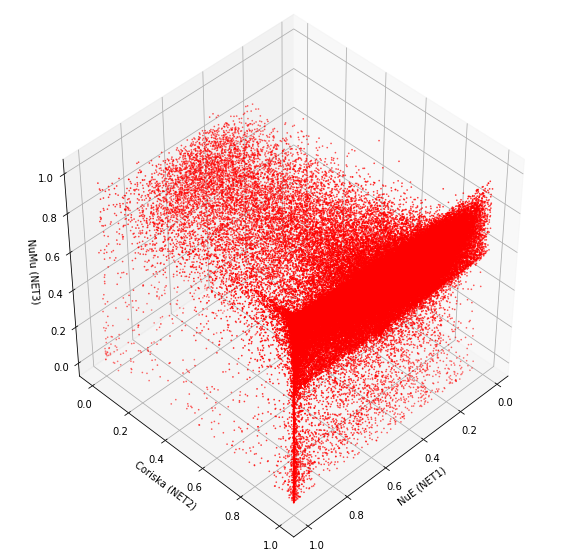

In [29]:
Plot3D(data_tc['preds']['n1'],data_tc['preds']['n2'],data_tc['preds']['n3'], color = colors[0])